In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [2]:
import time
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
from sklearn.decomposition import PCA

In [6]:
def make_teams_stats_url(option, year):
    season = str(year) + ('-') + str(year+1)[2:]    
    base_url = 'https://www.nba.com/stats/teams/boxscores-'
    opt1 = option
    opt2 = '?Season=' + season
    url = base_url + opt1 + opt2
    return url

In [7]:
def to_float(df):
    for column in df.columns:
        try:
            df[column] = df[column].astype('float')
        except:
            continue

In [8]:
sns.set(rc = {'figure.figsize': (18, 16)})

# selenium으로 데이터 받기

## 데이터 받기

### 2021-22 시즌

In [9]:
driver = webdriver.Chrome('../chromedriver.exe')

g_advanced_2122 = pd.DataFrame()

for year in range(2021, 2022):
    print(year)
    driver.get(make_teams_stats_url('advanced', year))
    
    time.sleep(3)
    
    driver.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div[2]/div[3]/section[2]/div/div[2]/div[2]/div[1]/div[3]/div/label/div/select/option[1]').click()
    
    table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz')    
    
        
    columns = []
    thead = table.find_element(By.TAG_NAME, "thead")
    for tr in thead.find_elements(By.CLASS_NAME, "Crom_headers__mzI_m"):     
        for th in tr.find_elements(By.TAG_NAME, "th"):
            columns.append(th.get_attribute("innerText"))          
        
    
    tbody = table.find_element(By.TAG_NAME, "tbody")
    season = str(year) + ('-') + str(year+1)[2:]
    data = []
    row = []
    count = 0
    for tr in tbody.find_elements(By.TAG_NAME, "tr"):
        for td in tr.find_elements(By.TAG_NAME, "td"):        
            row.append(td.get_attribute("innerText"))                                          
        data.append(row)        
        row = []    
    g_advanced_2122 = pd.concat([g_advanced_2122, pd.DataFrame(data, columns = columns)])

2021


In [10]:
driver = webdriver.Chrome('../chromedriver.exe')

g_traditional_2122 = pd.DataFrame()

for year in range(2021, 2022):
    print(year)
    driver.get(make_teams_stats_url('traditional', year))
    
    time.sleep(3)
    
    driver.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div[2]/div[3]/section[2]/div/div[2]/div[2]/div[1]/div[3]/div/label/div/select/option[1]').click()
    
    table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz')    
    
        
    columns = []
    thead = table.find_element(By.TAG_NAME, "thead")
    for tr in thead.find_elements(By.CLASS_NAME, "Crom_headers__mzI_m"):     
        for th in tr.find_elements(By.TAG_NAME, "th"):
            columns.append(th.get_attribute("innerText"))          
        
    
    tbody = table.find_element(By.TAG_NAME, "tbody")
    season = str(year) + ('-') + str(year+1)[2:]
    data = []
    row = []
    count = 0
    for tr in tbody.find_elements(By.TAG_NAME, "tr"):
        for td in tr.find_elements(By.TAG_NAME, "td"):        
            row.append(td.get_attribute("innerText"))                                          
        data.append(row)        
        row = []    
    g_traditional_2122 = pd.concat([g_traditional_2122, pd.DataFrame(data, columns = columns)])

2021


In [11]:
driver = webdriver.Chrome('../chromedriver.exe')

g_factors_2122 = pd.DataFrame()

for year in range(2021, 2022):
    print(year)
    driver.get(make_teams_stats_url('four-factors', year))
    
    time.sleep(3)
    
    driver.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div[2]/div[3]/section[2]/div/div[2]/div[2]/div[1]/div[3]/div/label/div/select/option[1]').click()
    
    table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz')    
    
        
    columns = []
    thead = table.find_element(By.TAG_NAME, "thead")
    for tr in thead.find_elements(By.CLASS_NAME, "Crom_headers__mzI_m"):     
        for th in tr.find_elements(By.TAG_NAME, "th"):
            columns.append(th.get_attribute("innerText"))          
        
    
    tbody = table.find_element(By.TAG_NAME, "tbody")
    season = str(year) + ('-') + str(year+1)[2:]
    data = []
    row = []
    count = 0
    for tr in tbody.find_elements(By.TAG_NAME, "tr"):
        for td in tr.find_elements(By.TAG_NAME, "td"):        
            row.append(td.get_attribute("innerText"))                                          
        data.append(row)        
        row = []    
    g_factors_2122 = pd.concat([g_factors_2122, pd.DataFrame(data, columns = columns)])

2021


In [12]:
driver = webdriver.Chrome('../chromedriver.exe')

s_diff_2122 = pd.DataFrame()

# 2021-22 시즌만
driver.get('https://www.nba.com/stats/teams/defense-dash-overall?Season=2021-22')
    
time.sleep(3)

table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz')    

columns = []
thead = table.find_element(By.TAG_NAME, "thead")
for tr in thead.find_elements(By.CLASS_NAME, "Crom_headers__mzI_m"):     
    for th in tr.find_elements(By.TAG_NAME, "th"):
        columns.append(th.get_attribute("innerText"))          


tbody = table.find_element(By.TAG_NAME, "tbody")
data = []
row = []
count = 0
for tr in tbody.find_elements(By.TAG_NAME, "tr"):
    for td in tr.find_elements(By.TAG_NAME, "td"):        
        row.append(td.get_attribute("innerText"))                                          
    data.append(row)        
    row = []    
s_diff_2122 = pd.concat([s_diff_2122, pd.DataFrame(data, columns = columns)])

In [14]:
driver = webdriver.Chrome('../chromedriver.exe')

s_advanced_2122 = pd.DataFrame()

# 2021-22 시즌만
driver.get('https://www.nba.com/stats/teams/advanced?Season=2021-22')
    
time.sleep(3)

table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz')    

columns = []
thead = table.find_element(By.TAG_NAME, "thead")
for tr in thead.find_elements(By.CLASS_NAME, "Crom_headers__mzI_m"):     
    for th in tr.find_elements(By.TAG_NAME, "th"):
        columns.append(th.get_attribute("innerText"))  
    columns = columns[:21]


tbody = table.find_element(By.TAG_NAME, "tbody")
data = []
row = []
count = 0
for tr in tbody.find_elements(By.TAG_NAME, "tr"):
    for td in tr.find_elements(By.TAG_NAME, "td"):        
        row.append(td.get_attribute("innerText"))                                          
    data.append(row)        
    row = []    
s_advanced_2122 = pd.concat([s_advanced_2122, pd.DataFrame(data, columns = columns)])

In [15]:
driver = webdriver.Chrome('../chromedriver.exe')

s_traditional_2122 = pd.DataFrame()

# 2021-22 시즌만
driver.get('https://www.nba.com/stats/teams/traditional?Season=2021-22')
    
time.sleep(3)

table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz')    

columns = []
thead = table.find_element(By.TAG_NAME, "thead")
for tr in thead.find_elements(By.CLASS_NAME, "Crom_headers__mzI_m"):     
    for th in tr.find_elements(By.TAG_NAME, "th"):
        columns.append(th.get_attribute("innerText"))  
    columns = columns[:28]


tbody = table.find_element(By.TAG_NAME, "tbody")
data = []
row = []
count = 0
for tr in tbody.find_elements(By.TAG_NAME, "tr"):
    for td in tr.find_elements(By.TAG_NAME, "td"):        
        row.append(td.get_attribute("innerText"))                                          
    data.append(row)        
    row = []    
s_traditional_2122 = pd.concat([s_traditional_2122, pd.DataFrame(data, columns = columns)])

In [16]:
driver = webdriver.Chrome('../chromedriver.exe')

s_factors_2122 = pd.DataFrame()

# 2021-22 시즌만
driver.get('https://www.nba.com/stats/teams/four-factors?Season=2021-22')
    
time.sleep(3)

table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz')    

columns = []
thead = table.find_element(By.TAG_NAME, "thead")
for tr in thead.find_elements(By.CLASS_NAME, "Crom_headers__mzI_m"):     
    for th in tr.find_elements(By.TAG_NAME, "th"):
        columns.append(th.get_attribute("innerText"))          
    columns = columns[:15]


tbody = table.find_element(By.TAG_NAME, "tbody")
data = []
row = []
count = 0
for tr in tbody.find_elements(By.TAG_NAME, "tr"):
    for td in tr.find_elements(By.TAG_NAME, "td"):        
        row.append(td.get_attribute("innerText"))                                          
    data.append(row)        
    row = []    
s_factors_2122 = pd.concat([s_factors_2122, pd.DataFrame(data, columns = columns)])

### 2022-23 시즌

In [17]:
driver = webdriver.Chrome('../chromedriver.exe')

g_advanced_2223 = pd.DataFrame()

for year in range(2022, 2023):
    print(year)
    driver.get(make_teams_stats_url('advanced', year))
    
    time.sleep(3)
    
    driver.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div[2]/div[3]/section[2]/div/div[2]/div[2]/div[1]/div[3]/div/label/div/select/option[1]').click()
    
    table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz')    
    
        
    columns = []
    thead = table.find_element(By.TAG_NAME, "thead")
    for tr in thead.find_elements(By.CLASS_NAME, "Crom_headers__mzI_m"):     
        for th in tr.find_elements(By.TAG_NAME, "th"):
            columns.append(th.get_attribute("innerText"))          
        
    
    tbody = table.find_element(By.TAG_NAME, "tbody")
    season = str(year) + ('-') + str(year+1)[2:]
    data = []
    row = []
    count = 0
    for tr in tbody.find_elements(By.TAG_NAME, "tr"):
        for td in tr.find_elements(By.TAG_NAME, "td"):        
            row.append(td.get_attribute("innerText"))                                          
        data.append(row)        
        row = []    
    g_advanced_2223 = pd.concat([g_advanced_2223, pd.DataFrame(data, columns = columns)])

2022


In [18]:
driver = webdriver.Chrome('../chromedriver.exe')

g_traditional_2223 = pd.DataFrame()

for year in range(2022, 2023):
    print(year)
    driver.get(make_teams_stats_url('traditional', year))
    
    time.sleep(3)
    
    driver.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div[2]/div[3]/section[2]/div/div[2]/div[2]/div[1]/div[3]/div/label/div/select/option[1]').click()
    
    table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz')    
    
        
    columns = []
    thead = table.find_element(By.TAG_NAME, "thead")
    for tr in thead.find_elements(By.CLASS_NAME, "Crom_headers__mzI_m"):     
        for th in tr.find_elements(By.TAG_NAME, "th"):
            columns.append(th.get_attribute("innerText"))          
        
    
    tbody = table.find_element(By.TAG_NAME, "tbody")
    season = str(year) + ('-') + str(year+1)[2:]
    data = []
    row = []
    count = 0
    for tr in tbody.find_elements(By.TAG_NAME, "tr"):
        for td in tr.find_elements(By.TAG_NAME, "td"):        
            row.append(td.get_attribute("innerText"))                                          
        data.append(row)        
        row = []    
    g_traditional_2223 = pd.concat([g_traditional_2223, pd.DataFrame(data, columns = columns)])

2022


In [19]:
driver = webdriver.Chrome('../chromedriver.exe')

g_factors_2223 = pd.DataFrame()

for year in range(2022, 2023):
    print(year)
    driver.get(make_teams_stats_url('four-factors', year))
    
    time.sleep(3)
    
    driver.find_element(By.XPATH, '//*[@id="__next"]/div[2]/div[2]/div[3]/section[2]/div/div[2]/div[2]/div[1]/div[3]/div/label/div/select/option[1]').click()
    
    table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz')    
    
        
    columns = []
    thead = table.find_element(By.TAG_NAME, "thead")
    for tr in thead.find_elements(By.CLASS_NAME, "Crom_headers__mzI_m"):     
        for th in tr.find_elements(By.TAG_NAME, "th"):
            columns.append(th.get_attribute("innerText"))          
        
    
    tbody = table.find_element(By.TAG_NAME, "tbody")
    season = str(year) + ('-') + str(year+1)[2:]
    data = []
    row = []
    count = 0
    for tr in tbody.find_elements(By.TAG_NAME, "tr"):
        for td in tr.find_elements(By.TAG_NAME, "td"):        
            row.append(td.get_attribute("innerText"))                                          
        data.append(row)        
        row = []    
    g_factors_2223 = pd.concat([g_factors_2223, pd.DataFrame(data, columns = columns)])

2022


In [20]:
driver = webdriver.Chrome('../chromedriver.exe')

s_traditional_2223 = pd.DataFrame()

driver.get('https://www.nba.com/stats/teams/traditional')
    
time.sleep(3)

table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz')    

columns = []
thead = table.find_element(By.TAG_NAME, "thead")
for tr in thead.find_elements(By.CLASS_NAME, "Crom_headers__mzI_m"):     
    for th in tr.find_elements(By.TAG_NAME, "th"):
        columns.append(th.get_attribute("innerText"))          
    columns = columns[:28]


tbody = table.find_element(By.TAG_NAME, "tbody")
data = []
row = []
count = 0
for tr in tbody.find_elements(By.TAG_NAME, "tr"):
    for td in tr.find_elements(By.TAG_NAME, "td"):        
        row.append(td.get_attribute("innerText"))                                          
    data.append(row)        
    row = []    
s_traditional_2223 = pd.concat([s_traditional_2223, pd.DataFrame(data, columns = columns)])

In [21]:
driver = webdriver.Chrome('../chromedriver.exe')

s_advanced_2223 = pd.DataFrame()

driver.get('https://www.nba.com/stats/teams/advanced')
    
time.sleep(3)

table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz')    

columns = []
thead = table.find_element(By.TAG_NAME, "thead")
for tr in thead.find_elements(By.CLASS_NAME, "Crom_headers__mzI_m"):     
    for th in tr.find_elements(By.TAG_NAME, "th"):
        columns.append(th.get_attribute("innerText")) 
    columns = columns[:21]


tbody = table.find_element(By.TAG_NAME, "tbody")
data = []
row = []
count = 0
for tr in tbody.find_elements(By.TAG_NAME, "tr"):
    for td in tr.find_elements(By.TAG_NAME, "td"):        
        row.append(td.get_attribute("innerText"))                                          
    data.append(row)        
    row = []    
s_advanced_2223 = pd.concat([s_advanced_2223, pd.DataFrame(data, columns = columns)])

In [22]:
driver = webdriver.Chrome('../chromedriver.exe')

s_diff_2223 = pd.DataFrame()

# 2021-22 시즌만
driver.get('https://www.nba.com/stats/teams/defense-dash-overall')
    
time.sleep(3)

table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz')    

columns = []
thead = table.find_element(By.TAG_NAME, "thead")
for tr in thead.find_elements(By.CLASS_NAME, "Crom_headers__mzI_m"):     
    for th in tr.find_elements(By.TAG_NAME, "th"):
        columns.append(th.get_attribute("innerText"))           


tbody = table.find_element(By.TAG_NAME, "tbody")
data = []
row = []
count = 0
for tr in tbody.find_elements(By.TAG_NAME, "tr"):
    for td in tr.find_elements(By.TAG_NAME, "td"):        
        row.append(td.get_attribute("innerText"))                                          
    data.append(row)        
    row = []    
s_diff_2223 = pd.concat([s_diff_2223, pd.DataFrame(data, columns = columns)])

In [23]:
driver = webdriver.Chrome('../chromedriver.exe')

s_factors_2223 = pd.DataFrame()

# 2021-22 시즌만
driver.get('https://www.nba.com/stats/teams/four-factors')
    
time.sleep(3)

table = driver.find_element(By.CLASS_NAME, 'Crom_table__p1iZz')    

columns = []
thead = table.find_element(By.TAG_NAME, "thead")
for tr in thead.find_elements(By.CLASS_NAME, "Crom_headers__mzI_m"):     
    for th in tr.find_elements(By.TAG_NAME, "th"):
        columns.append(th.get_attribute("innerText"))   
    columns = columns[:15]


tbody = table.find_element(By.TAG_NAME, "tbody")
data = []
row = []
count = 0
for tr in tbody.find_elements(By.TAG_NAME, "tr"):
    for td in tr.find_elements(By.TAG_NAME, "td"):        
        row.append(td.get_attribute("innerText"))                                          
    data.append(row)        
    row = []    
s_factors_2223 = pd.concat([s_factors_2223, pd.DataFrame(data, columns = columns)])

In [ ]:
g_advanced_2223

In [28]:
g_traditional_2223

,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,TOR,TOR vs. CHI,11/06/2022,W,48,113,44,103,42.7,10,...,75.0,23,29,52,28,9,11,10,16,9
1,LAL,LAL vs. CLE,11/06/2022,L,48,100,40,87,46.0,8,...,57.1,10,33,43,24,17,4,4,26,-14
2,CHI,CHI @ TOR,11/06/2022,L,48,104,40,88,45.5,13,...,84.6,15,31,46,27,17,5,10,20,-9
3,LAC,LAC vs. UTA,11/06/2022,L,48,102,43,87,49.4,8,...,61.5,4,28,32,22,14,11,2,26,-8
4,MEM,MEM vs. WAS,11/06/2022,W,48,103,39,91,42.9,9,...,80.0,12,38,50,20,11,8,2,17,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,MIA,MIA vs. CHI,10/19/2022,L,48,108,37,80,46.3,12,...,78.6,8,38,46,21,19,6,2,24,-8
282,GSW,GSW vs. LAL,10/18/2022,W,48,123,45,99,45.5,16,...,73.9,11,37,48,31,18,11,4,23,14
283,BOS,BOS vs. PHI,10/18/2022,W,48,126,46,82,56.1,12,...,78.6,6,30,36,24,11,8,3,24,9
284,PHI,PHI @ BOS,10/18/2022,L,48,117,40,80,50.0,13,...,85.7,4,27,31,16,14,8,3,25,-9


## 데이터 정리

### 2021-22 시즌

In [24]:
to_float(g_advanced_2122)
to_float(g_traditional_2122)
to_float(g_factors_2122)
to_float(s_diff_2122)
to_float(s_advanced_2122)
to_float(s_traditional_2122)
to_float(s_factors_2122)

In [25]:
g_advanced_2122.rename(columns={'MATCH\xa0UP': 'MATCH UP', 'GAME\xa0DATE': 'GAME DATE', '\nTEAM': 'TEAM'}, inplace=True)
g_factors_2122.rename(columns={'EFG%':'EFG', 'OPP\nEFG%':'OEFG'}, inplace=True)

In [26]:
g_traditional_2122['GAME DATE'] = g_traditional_2122['GAME DATE'].astype('datetime64')
g_advanced_2122['GAME DATE'] = g_advanced_2122['GAME DATE'].astype('datetime64')
g_factors_2122['GAME DATE'] = g_factors_2122['GAME DATE'].astype('datetime64')

In [27]:
g_total_2122 = pd.merge(g_traditional_2122, g_advanced_2122, on =['TEAM', 'MATCH UP', 'GAME DATE'])
g_total_2122

,TEAM,MATCH UP,GAME DATE,W/L_x,MIN_x,PTS,FGM,FGA,FG%,3PM,...,AST/TO,AST\nRATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,ORL,ORL vs. MIA,2022-04-10,W,48.0,125.0,45.0,91.0,49.5,23.0,...,3.30,23.2,19.1,77.2,51.0,9.9,62.1,64.3,100.00,57.6
1,PHX,PHX vs. SAC,2022-04-10,L,48.0,109.0,42.0,103.0,40.8,14.0,...,2.45,18.1,36.5,82.1,53.9,11.1,47.6,49.7,99.00,43.2
2,ATL,ATL @ HOU,2022-04-10,W,48.0,130.0,45.0,87.0,51.7,21.0,...,2.23,20.6,32.6,78.4,56.7,13.4,63.8,66.6,97.50,57.7
3,MEM,MEM vs. BOS,2022-04-10,L,48.0,110.0,39.0,102.0,38.2,15.0,...,2.70,17.9,32.4,57.8,42.5,9.8,45.6,48.3,102.50,37.2
4,LAL,LAL @ DEN,2022-04-10,W,53.0,146.0,44.0,94.0,46.8,16.0,...,2.00,16.7,32.7,70.4,51.9,11.5,55.3,63.7,103.25,52.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,TOR,TOR vs. WAS,2021-10-20,L,48.0,83.0,30.0,97.0,30.9,7.0,...,0.74,9.9,30.4,80.0,50.0,17.8,34.5,38.9,106.50,30.0
2456,GSW,GSW @ LAL,2021-10-19,W,48.0,121.0,41.0,93.0,44.1,14.0,...,1.76,19.2,24.1,81.1,52.3,15.0,51.6,57.0,112.50,57.8
2457,BKN,BKN @ MIL,2021-10-19,L,48.0,104.0,37.0,84.0,44.0,17.0,...,1.46,14.8,17.6,70.7,45.9,12.7,54.2,55.2,102.00,40.7
2458,LAL,LAL vs. GSW,2021-10-19,L,48.0,114.0,45.0,95.0,47.4,15.0,...,1.17,14.7,18.9,75.9,47.7,16.1,55.3,55.1,112.50,42.2


In [28]:
g_total_2122['ATEAM'] = g_total_2122['MATCH UP'].replace('[^A-Z]+', ' ', regex=True).str.split(' ').str[0]
g_total_2122['BTEAM'] = g_total_2122['MATCH UP'].replace('[^A-Z]+', ' ', regex=True).str.split(' ').str[1]

In [29]:
np.sort(g_total_2122['TEAM'].unique())

array(['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET',
       'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN',
       'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS',
       'TOR', 'UTA', 'WAS'], dtype=object)

In [30]:
s_diff_2122['TEAM'].unique()

array(['Boston Celtics', 'Golden State Warriors', 'Phoenix Suns',
       'New York Knicks', 'Miami Heat', 'LA Clippers',
       'Cleveland Cavaliers', 'Brooklyn Nets', 'Utah Jazz',
       'Memphis Grizzlies', 'Milwaukee Bucks', 'Oklahoma City Thunder',
       'Dallas Mavericks', 'Orlando Magic', 'Philadelphia 76ers',
       'Minnesota Timberwolves', 'Toronto Raptors', 'Washington Wizards',
       'San Antonio Spurs', 'Charlotte Hornets', 'Los Angeles Lakers',
       'Denver Nuggets', 'New Orleans Pelicans', 'Detroit Pistons',
       'Atlanta Hawks', 'Chicago Bulls', 'Portland Trail Blazers',
       'Sacramento Kings', 'Houston Rockets', 'Indiana Pacers'],
      dtype=object)

In [31]:
team_dict = {'Boston Celtics':'BOS' , 'Golden State Warriors':'GSW' , 'Phoenix Suns':'PHX' , 'New York Knicks':'NYK',
             'Miami Heat':'MIA' , 'LA Clippers':'LAC' , 'Cleveland Cavaliers':'CLE' , 'Brooklyn Nets':'BKN',
             'Utah Jazz':'UTA' , 'Memphis Grizzlies':'MEM', 'Milwaukee Bucks':'MIL' , 'Oklahoma City Thunder':'OKC', 
             'Dallas Mavericks':'DAL' , 'Orlando Magic':'ORL', 'Philadelphia 76ers':'PHI',
             'Minnesota Timberwolves':'MIN', 'Toronto Raptors':'TOR', 'Washington Wizards':'WAS',
             'San Antonio Spurs':'SAS', 'Charlotte Hornets':'CHA', 'Los Angeles Lakers':'LAL',
             'Denver Nuggets':'DEN', 'New Orleans Pelicans':'NOP', 'Detroit Pistons':'DET',
             'Atlanta Hawks':'ATL', 'Chicago Bulls':'CHI', 'Portland Trail Blazers':'POR',
             'Sacramento Kings':'SAC', 'Houston Rockets':'HOU', 'Indiana Pacers':'IND'}

In [32]:
s_factors_2122.rename(columns={'OPP\nEFG%':'OPP EFG%'}, inplace=True)

In [33]:
s_diff_2122['TEAM'] = s_diff_2122['TEAM'].map(team_dict)
s_advanced_2122['TEAM'] = s_advanced_2122['TEAM'].map(team_dict)
s_traditional_2122['TEAM'] = s_traditional_2122['TEAM'].map(team_dict)
s_factors_2122['TEAM'] = s_factors_2122['TEAM'].map(team_dict)

### 2022-23 시즌

In [34]:
to_float(g_advanced_2223)
to_float(g_traditional_2223)
to_float(g_factors_2223)
to_float(s_diff_2223)
to_float(s_advanced_2223)
to_float(s_traditional_2223)
to_float(s_factors_2223)

In [35]:
g_advanced_2223.rename(columns={'MATCH\xa0UP': 'MATCH UP', 'GAME\xa0DATE': 'GAME DATE', '\nTEAM': 'TEAM'}, inplace=True)
g_factors_2223.rename(columns={'EFG%':'EFG', 'OPP\nEFG%':'OEFG'}, inplace=True)

In [36]:
g_traditional_2223['GAME DATE'] = g_traditional_2223['GAME DATE'].astype('datetime64')
g_advanced_2223['GAME DATE'] = g_advanced_2223['GAME DATE'].astype('datetime64')
g_factors_2223['GAME DATE'] = g_factors_2223['GAME DATE'].astype('datetime64')

In [37]:
g_total_2223 = pd.merge(g_traditional_2223, g_advanced_2223, on =['TEAM', 'MATCH UP', 'GAME DATE'])
g_total_2223

,TEAM,MATCH UP,GAME DATE,W/L_x,MIN_x,PTS,FGM,FGA,FG%,3PM,...,AST/TO,AST\nRATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,CHA,CHA vs. WAS,2022-11-07,L,48.0,100.0,42.0,101.0,41.6,5.0,...,2.45,18.6,36.1,71.4,50.5,11.2,44.1,46.3,97.5,45.0
1,OKC,OKC @ DET,2022-11-07,L,48.0,103.0,41.0,102.0,40.2,10.0,...,2.30,16.0,29.7,58.6,43.4,9.8,45.1,47.0,102.0,44.2
2,WAS,WAS @ CHA,2022-11-07,W,48.0,108.0,42.0,80.0,52.5,5.0,...,1.40,16.2,28.6,63.9,49.5,15.5,55.6,57.9,97.5,55.0
3,PHI,PHI vs. PHX,2022-11-07,W,48.0,100.0,31.0,80.0,38.8,12.0,...,1.38,16.5,37.3,81.4,57.4,17.4,46.3,53.4,92.5,55.3
4,MIA,MIA vs. POR,2022-11-07,L,48.0,107.0,40.0,84.0,47.6,14.0,...,2.33,21.4,19.6,85.7,48.1,12.8,56.0,59.1,94.5,48.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,CLE,CLE @ TOR,2022-10-19,L,48.0,105.0,38.0,77.0,49.4,10.0,...,1.47,18.9,19.5,67.9,46.8,17.2,55.8,60.3,99.0,52.1
312,BOS,BOS vs. PHI,2022-10-18,W,48.0,126.0,46.0,82.0,56.1,12.0,...,2.18,18.5,25.6,81.0,54.3,11.3,63.4,66.8,97.5,56.6
313,LAL,LAL @ GSW,2022-10-18,L,48.0,109.0,40.0,94.0,42.6,10.0,...,1.05,15.4,24.6,71.9,48.2,19.6,47.9,51.9,113.5,45.2
314,GSW,GSW vs. LAL,2022-10-18,W,48.0,123.0,45.0,99.0,45.5,16.0,...,1.72,19.1,28.1,75.4,51.8,15.7,53.5,56.4,113.5,54.8


In [39]:
g_total_2223['ATEAM'] = g_total_2223['MATCH UP'].replace('[^A-Z]+', ' ', regex=True).str.split(' ').str[0]
g_total_2223['BTEAM'] = g_total_2223['MATCH UP'].replace('[^A-Z]+', ' ', regex=True).str.split(' ').str[1]

In [40]:
s_factors_2223.rename(columns={'OPP\nEFG%':'OPP EFG%'}, inplace=True)

In [41]:
s_diff_2223['TEAM'] = s_diff_2223['TEAM'].map(team_dict)
s_advanced_2223['TEAM'] = s_advanced_2223['TEAM'].map(team_dict)
s_traditional_2223['TEAM'] = s_traditional_2223['TEAM'].map(team_dict)
s_factors_2223['TEAM'] = s_factors_2223['TEAM'].map(team_dict)

# 회귀 예측

## OFFRTG 예측

### 데이터 훈련(2021-22 시즌)

In [180]:
# 이전 최근 5경기 데이터의 OFFRTG의 평균 값 반환
def bring_last_game_off_2122(team_name, game_date, type_od):
    data_by_team = g_total_2122[g_total_2122['TEAM'] == team_name].sort_values('GAME DATE').reset_index(drop=True)
    last_game_index_li = data_by_team[data_by_team['GAME DATE'] < game_date].index.values[-5:]
    total = 0
    for index in last_game_index_li:     
        if type_od =='OFFRTG':
            total += data_by_team.iloc[index].OFFRTG
        elif type_od =='DEFRTG':
            total += data_by_team.iloc[index].DEFRTG
        else : 
            print('type_od 설정 오류')
            return
    if len(last_game_index_li) == 0:
        result = np.nan
    else:
        result = total / len(last_game_index_li)   
    return round(result,1)

In [304]:
# 지난 경기들을 계산하기 위해 지난 경기 이전 데이터를 사용하자
# ATEAM_OFFRTG, ATEAM_EFG, BTEAM_DEFRTG, BTEAM_OEFG
# 이전 경기들의 평균
def bring_last_game_od_2122(team_name, game_date, category):
    data_by_team = g_total_2122[g_total_2122['TEAM'] == team_name].sort_values('GAME DATE').reset_index(drop=True)
    last_game_index_li = data_by_team[data_by_team['GAME DATE'] < game_date].index.values    
    total = 0
    for index in last_game_index_li:     
        if category =='OFFRTG':                        
            total += data_by_team.iloc[index].OFFRTG
        elif category =='DEFRTG':
            total += data_by_team.iloc[index].DEFRTG
        elif category =='PIE':
            total += data_by_team.iloc[index].PIE
        elif category =='TS%':
            total += data_by_team.iloc[index]['TS%']
        elif category =='FG%':
            total += data_by_team.iloc[index]['FG%']
        elif category =='FGA':
            total += data_by_team.iloc[index].FGA
        elif category =='3PA':
            total += data_by_team.iloc[index]['3PA']
        else : 
            print('type_od 설정 오류')
            return
    if len(last_game_index_li) == 0:
        result = np.nan
    else:        
        result = total / len(last_game_index_li)   
    return round(result,1)


In [119]:
# 지난 경기들을 계산하기 위해 지난 경기 이전 데이터를 사용하자
# ATEAM_EFG, BTEAM_OEFG
# 이전 경기들의 평균
def bring_last_game_efg_2122(team_name, game_date, category):
    data_by_team = g_factors_2122[g_factors_2122['TEAM'] == team_name].sort_values('GAME DATE').reset_index(drop=True)
    last_game_index_li = data_by_team[data_by_team['GAME DATE'] < game_date].index.values    
    total = 0
    for index in last_game_index_li:     
        if category =='EFG':            
            total += data_by_team.iloc[index].EFG
        elif category =='OEFG':
            total += data_by_team.iloc[index].OEFG        
        else : 
            print('type_od 설정 오류')
            return
    if len(last_game_index_li) == 0:
        result = np.nan
    else:        
        result = total / len(last_game_index_li)   
    return round(result,1)


In [181]:
running_off_df = pd.DataFrame()

In [ ]:
# running_off_df['ATEAM_TS'] =  g_total_2122['ATEAM'].apply(lambda x : s_advanced_2122[s_advanced_2122['TEAM'] == x]['TS%'].reset_index(drop=True))
# running_off_df['ATEAM_FG%'] =  g_total_2122['ATEAM'].apply(lambda x : s_traditional_2122[s_traditional_2122['TEAM'] == x]['FG%'].reset_index(drop=True))

In [ ]:
# 이전 5경기 평균값 가져오기

In [182]:
running_off_df['ATEAM_OFFRTG'] =  g_total_2122.apply(lambda x : bring_last_game_od_2122(x['ATEAM'], x['GAME DATE'], 'OFFRTG'), axis = 1)
running_off_df['ATEAM_PRE_OFF'] =  g_total_2122.apply(lambda x : bring_last_game_off_2122(x['ATEAM'],x['GAME DATE'], 'OFFRTG'), axis=1)
running_off_df['ATEAM_EFG'] =  g_total_2122.apply(lambda x : bring_last_game_efg_2122(x['ATEAM'], x['GAME DATE'], 'EFG'), axis = 1)
running_off_df['ATEAM_PIE'] =  g_total_2122.apply(lambda x : bring_last_game_od_2122(x['ATEAM'], x['GAME DATE'], 'PIE'), axis = 1)
running_off_df['BTEAM_DEFRTG'] =  g_total_2122.apply(lambda x : bring_last_game_od_2122(x['ATEAM'], x['GAME DATE'], 'OFFRTG'), axis = 1)
running_off_df['BTEAM_PRE_DEF'] =  g_total_2122.apply(lambda x : bring_last_game_off_2122(x['BTEAM'],x['GAME DATE'], 'DEFRTG'), axis=1)
running_off_df['BTEAM_DIFF'] =  g_total_2122['BTEAM'].apply(lambda x : s_diff_2122[s_diff_2122['TEAM'] == x]['DIFF%'].reset_index(drop=True))
running_off_df['BTEAM_OEFG'] =  g_total_2122.apply(lambda x : bring_last_game_efg_2122(x['ATEAM'], x['GAME DATE'], 'OEFG'), axis = 1)

In [ ]:
# 기존

In [44]:
running_off_df['ATEAM_OFFRTG'] =  g_total_2122['ATEAM'].apply(lambda x : s_advanced_2122[s_advanced_2122['TEAM'] == x]['OFFRTG'].reset_index(drop=True))
running_off_df['ATEAM_PRE_OFF'] =  g_total_2122.apply(lambda x : bring_last_game_off_2122(x['ATEAM'],x['GAME DATE'], 'OFFRTG'), axis=1)
running_off_df['ATEAM_EFG'] =  g_total_2122['ATEAM'].apply(lambda x : s_factors_2122[s_factors_2122['TEAM'] == x]['EFG%'].reset_index(drop=True))
running_off_df['ATEAM_PIE'] =  g_total_2122['ATEAM'].apply(lambda x : s_advanced_2122[s_advanced_2122['TEAM'] == x]['PIE'].reset_index(drop=True))
running_off_df['BTEAM_DEFRTG'] =  g_total_2122['BTEAM'].apply(lambda x : s_advanced_2122[s_advanced_2122['TEAM'] == x]['DEFRTG'].reset_index(drop=True))
running_off_df['BTEAM_PRE_DEF'] =  g_total_2122.apply(lambda x : bring_last_game_off_2122(x['BTEAM'],x['GAME DATE'], 'DEFRTG'), axis=1)
running_off_df['BTEAM_DIFF'] =  g_total_2122['BTEAM'].apply(lambda x : s_diff_2122[s_diff_2122['TEAM'] == x]['DIFF%'].reset_index(drop=True))
running_off_df['BTEAM_OEFG'] =  g_total_2122['BTEAM'].apply(lambda x : s_factors_2122[s_factors_2122['TEAM'] == x]['OPP EFG%'].reset_index(drop=True))

In [161]:
running_off_df

,ATEAM_OFFRTG,ATEAM_PRE_OFF,ATEAM_EFG,ATEAM_PIE,ATEAM_PRE_PIE,BTEAM_DEFRTG,BTEAM_PRE_DEF,BTEAM_DIFF,BTEAM_OEFG
0,103.7,101.0,50.2,45.8,40.4,103.7,110.4,-1.3,53.3
1,114.4,105.9,55.1,55.0,48.7,114.4,116.6,1.9,51.0
2,115.1,118.5,54.3,50.7,53.5,115.1,119.0,2.2,54.4
3,114.4,114.8,52.4,53.0,52.1,114.4,110.5,-2.6,52.2
4,109.8,109.6,53.7,48.2,46.5,109.8,117.9,1.0,54.1
...,...,...,...,...,...,...,...,...,...
2455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
2456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.4,NaN
2458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.3,NaN


In [183]:
y_target = off_target = g_total_2122['OFFRTG']
X_data = off_data = running_off_df

In [184]:
# 결측치 제거해주고~
for i in off_data.columns:     
    off_target = off_target[off_data[i].notna()]    
    off_data = off_data[off_data[i].notna()]

In [185]:
scaler = StandardScaler()

In [186]:
pca = PCA(n_components = 3)

In [187]:
off_data_scale = scaler.fit_transform(off_data)

In [188]:
off_data_pca = pca.fit_transform(off_data_scale)
#off_data_pca

array([[ 2.87839883,  0.30612646, -0.56093413],
       [-2.27483393, -0.14573774,  1.70252153],
       [-2.32762228, -2.35471908,  0.48342205],
       ...,
       [-2.14936457, -3.71884933, -2.62212688],
       [ 3.72513934,  3.64178494,  5.0943196 ],
       [ 1.75214903, -0.02995975, -2.30359121]])

In [189]:
# 러닝 돌려주고~
lr_off = LinearRegression()
# lr_off.fit(off_data_scale, off_target)
lr_off.fit(off_data_pca, off_target)

LinearRegression()

In [207]:
rg_off = Ridge(alpha=100)
# lr_off.fit(off_data_scale, off_target)
rg_off.fit(off_data_pca, off_target)

Ridge(alpha=100)

In [52]:
coeff = pd.Series(data=lr_off.coef_ )
print(off_data.columns)
coeff.sort_values(ascending=False)

Index(['ATEAM_OFFRTG', 'ATEAM_PRE_OFF', 'ATEAM_EFG', 'ATEAM_PIE',
       'BTEAM_DEFRTG', 'BTEAM_PRE_DEF', 'BTEAM_DIFF', 'BTEAM_OEFG'],
      dtype='object')


2   -1.031771
1   -1.128214
0   -2.102511
dtype: float64

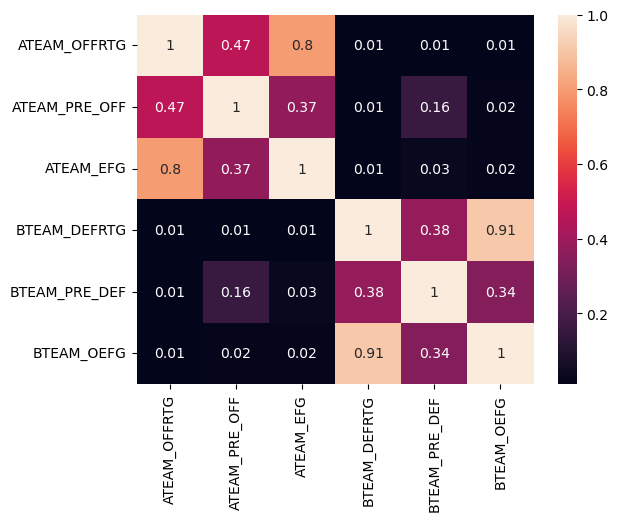

In [978]:
correlation_matrix = off_data.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True) #seaborn의 히트맵으로 시각화 
plt.show() 

In [979]:
X_train, X_test, y_train, y_test = \
    train_test_split(off_data_pca, off_target, test_size=0.2, random_state=156) 

In [980]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 113.865, RMSE : 10.671
Variance score : 0.145


<AxesSubplot:>

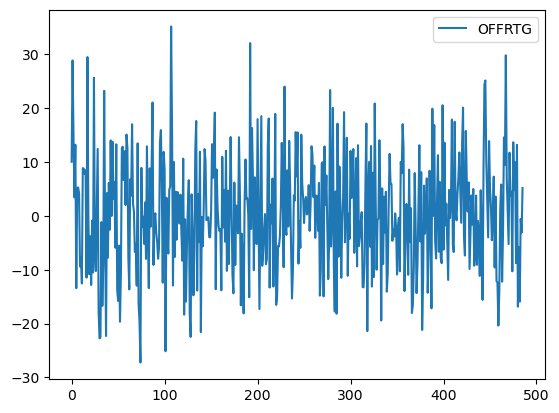

In [981]:
s = y_test - lr.predict(X_test)
s.to_frame().reset_index(drop=True).plot()

In [982]:
(abs(s)>5).sum()

305

### 매치업 데이터

In [1361]:
# 잠깐 쓸 것 
match_up_df = pd.DataFrame(data = [['SAC', 'ORL'], ['ORL', 'SAC'], ['BKN', 'CHA'], ['CHA', 'BKN'], \
                                  ['NOP', 'ATL'], ['ATL', 'NOP'], ['BOS', 'NYK'], ['NYK', 'BOS'],
                                  ['OKC', 'MIL'], ['MIL', 'OKC'], ['HOU', 'MIN'], ['MIN', 'HOU'],
                                  ['SAS', 'DEN'], ['DEN', 'SAS'], ['POR', 'PHX'], ['PHX', 'POR']],
                           columns=['ATEAM', 'BTEAM'])
match_up_df['GAME DATE'] = datetime.strptime('2022-11-05', "%Y-%m-%d")

In [863]:
# 잠깐 쓸 것 
match_up_df = pd.DataFrame(data = [['CLE', 'LAL'], ['LAL', 'CLE'], ['CHI', 'TOR'], ['TOR', 'CHI'], \
                                  ['WAS', 'MEM'], ['MEM', 'WAS'], ['UTA', 'LAC'], ['LAC', 'UTA']],
                           columns=['ATEAM', 'BTEAM'])
match_up_df['GAME DATE'] = datetime.strptime('2022-11-06', "%Y-%m-%d")

In [1388]:
# 아직 하지 않은 경기를 예측할 것이므로 다음날 할 경기를 적어준다.
match_up_df = pd.DataFrame(data = [['WAS', 'CHA'], ['CHA', 'WAS'], ['HOU', 'ORL'], ['ORL', 'HOU'], 
                                   ['OKC', 'DET'], ['DET', 'OKC'], ['NOP', 'IND'], ['IND', 'NOP'], 
                                   ['PHX', 'PHI'], ['PHI', 'PHX'], ['MIL', 'ATL'], ['ATL', 'MIL'], 
                                   ['POR', 'MIA'], ['MIA', 'POR'], ['TOR', 'CHI'], ['CHI', 'TOR'],  
                                   ['BOS', 'MEM'], ['MEM', 'BOS'], ['NYK', 'MIN'], ['MIN', 'NYK'],  
                                   ['DEN', 'SAS'], ['SAS', 'DEN'], ['BKN', 'DAL'], ['DAL', 'BKN'], 
                                   ['SAC', 'GSW'], ['GSW', 'SAC'], ['LAL', 'UTA'], ['UTA', 'LAL'],  
                                   ['CLE', 'LAC'], ['LAC', 'CLE']],
                           columns=['ATEAM', 'BTEAM'])
match_up_df['GAME DATE'] = datetime.strptime('2022-11-07', "%Y-%m-%d")

In [1189]:
# 아직 하지 않은 경기를 예측할 것이므로 다음날 할 경기를 적어준다.
match_up_df = pd.DataFrame(data = [['DAL', 'ORL'], ['ORL', 'DAL'], ['POR', 'CHA'], ['CHA', 'POR'], 
                                   ['DEN', 'IND'], ['IND', 'DEN'], ['UTA', 'ATL'], ['ATL', 'UTA'],
                                   ['DET', 'BOS'], ['BOS', 'DET'], ['NYK', 'BKN'], ['BKN', 'NYK'], 
                                   ['HOU', 'TOR'], ['TOR', 'HOU'], ['NOP', 'CHI'], ['CHI', 'NOP'], 
                                   ['PHX', 'MIN'], ['MIN', 'PHX'], ['MIL', 'OKC'], ['OKC', 'MIL'], 
                                   ['MEM', 'SAS'], ['SAS', 'MEM'], ['LAL', 'LAC'], ['LAC', 'LAL'], 
                                   ['CLE', 'SAC'], ['SAC', 'CLE']],
                           columns=['ATEAM', 'BTEAM'])
match_up_df['GAME DATE'] = datetime.strptime(str(datetime.now().date()), "%Y-%m-%d")

In [131]:
match_up_df

,ATEAM,BTEAM,GAME DATE
0,DAL,ORL,2022-11-10
1,ORL,DAL,2022-11-10
2,POR,CHA,2022-11-10
3,CHA,POR,2022-11-10
4,DEN,IND,2022-11-10
5,IND,DEN,2022-11-10
6,UTA,ATL,2022-11-10
7,ATL,UTA,2022-11-10
8,DET,BOS,2022-11-10
9,BOS,DET,2022-11-10


In [1058]:
match_up_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ATEAM      8 non-null      object        
 1   BTEAM      8 non-null      object        
 2   GAME DATE  8 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 320.0+ bytes


### 데이터 예측(2022-23 경기)

In [190]:
# 이전 최근 5경기 데이터의 OFFRTG의 평균 값 반환
def bring_last_game_off_2223(team_name, game_date, type_od):
    data_by_team = g_total_2223[g_total_2223['TEAM'] == team_name].sort_values('GAME DATE').reset_index(drop=True)
    last_game_index_li = data_by_team[data_by_team['GAME DATE'] < game_date].index.values[-5:]
    total = 0
    for index in last_game_index_li:     
        if type_od =='OFFRTG':
            total += data_by_team.iloc[index].OFFRTG
        elif type_od =='DEFRTG':
            total += data_by_team.iloc[index].DEFRTG
        else : 
            print('type_od 설정 오류')
            return
    if len(last_game_index_li) == 0:
        result = np.nan
    else:
        result = total / len(last_game_index_li)   
    return round(result,1)

In [312]:
# 지난 경기들을 계산하기 위해 지난 경기 이전 데이터를 사용하자
# ATEAM_OFFRTG, ATEAM_EFG, BTEAM_DEFRTG, BTEAM_OEFG
# 이전 경기들의 평균
def bring_last_game_od_2223(team_name, game_date, category):
    data_by_team = g_total_2223[g_total_2223['TEAM'] == team_name].sort_values('GAME DATE').reset_index(drop=True)
    last_game_index_li = data_by_team[data_by_team['GAME DATE'] < game_date].index.values    
    total = 0
    for index in last_game_index_li:     
        if category =='OFFRTG':                        
            total += data_by_team.iloc[index].OFFRTG
        elif category =='DEFRTG':
            total += data_by_team.iloc[index].DEFRTG
        elif category =='PIE':
            total += data_by_team.iloc[index].PIE
        elif category =='TS%':
            total += data_by_team.iloc[index]['TS%']
        elif category =='FG%':
            total += data_by_team.iloc[index]['FG%']
        elif category =='FGA':
            total += data_by_team.iloc[index].FGA
        elif category =='3PA':
            total += data_by_team.iloc[index]['3PA']
        else : 
            print('type_od 설정 오류')
            return
    if len(last_game_index_li) == 0:
        result = np.nan
    else:        
        result = total / len(last_game_index_li)   
    return round(result,1)


In [133]:
# 지난 경기들을 계산하기 위해 지난 경기 이전 데이터를 사용하자
# ATEAM_EFG, BTEAM_OEFG
# 이전 경기들의 평균
def bring_last_game_efg_2223(team_name, game_date, category):
    data_by_team = g_factors_2223[g_factors_2223['TEAM'] == team_name].sort_values('GAME DATE').reset_index(drop=True)
    last_game_index_li = data_by_team[data_by_team['GAME DATE'] < game_date].index.values    
    total = 0
    for index in last_game_index_li:     
        if category =='EFG':            
            total += data_by_team.iloc[index].EFG
        elif category =='OEFG':
            total += data_by_team.iloc[index].OEFG        
        else : 
            print('type_od 설정 오류')
            return
    if len(last_game_index_li) == 0:
        result = np.nan
    else:        
        result = total / len(last_game_index_li)   
    return round(result,1)


In [208]:
predict_off_df = pd.DataFrame()

In [209]:
# 잠시 쓸 것

In [210]:
predict_off_df['ATEAM_OFFRTG'] = match_up_df.apply(lambda x : bring_last_game_od_2223(x['ATEAM'], x['GAME DATE'], 'OFFRTG'), axis = 1) 
predict_off_df['ATEAM_PRE_OFF'] = match_up_df.apply(lambda x : bring_last_game_off_2223(x['ATEAM'],x['GAME DATE'], 'OFFRTG'), axis=1)
predict_off_df['ATEAM_EFG'] = match_up_df.apply(lambda x : bring_last_game_efg_2223(x['ATEAM'], x['GAME DATE'], 'EFG'), axis = 1)
predict_off_df['ATEAM_PIE'] =  match_up_df.apply(lambda x : bring_last_game_od_2223(x['ATEAM'], x['GAME DATE'], 'PIE'), axis = 1) 
predict_off_df['BTEAM_DEFRTG'] = match_up_df.apply(lambda x : bring_last_game_od_2223(x['BTEAM'], x['GAME DATE'], 'DEFRTG'), axis = 1) 
predict_off_df['BTEAM_PRE_DEF'] = match_up_df.apply(lambda x : bring_last_game_off_2223(x['BTEAM'],x['GAME DATE'], 'DEFRTG'), axis=1)
predict_off_df['BTEAM_DIFF'] = match_up_df['BTEAM'].apply(lambda x : s_diff_2223[s_diff_2223['TEAM'] == x]['DIFF%'].reset_index(drop=True))
predict_off_df['BTEAM_OEFG'] = match_up_df.apply(lambda x : bring_last_game_efg_2223(x['BTEAM'], x['GAME DATE'], 'OEFG'), axis = 1) 

In [ ]:
# 아직 안한경기는 이렇게 써도됨

In [ ]:
# predict_off_df['ATEAM_TS'] =  match_up_df['ATEAM'].apply(lambda x : s_advanced_2223[s_advanced_2223['TEAM'] == x]['TS%'].reset_index(drop=True))
# predict_off_df['ATEAM_FG%'] =  match_up_df['ATEAM'].apply(lambda x : s_traditional_2223[s_traditional_2223['TEAM'] == x]['FG%'].reset_index(drop=True))

In [553]:
predict_off_df['ATEAM_OFFRTG'] =  match_up_df['ATEAM'].apply(lambda x : s_advanced_2223[s_advanced_2223['TEAM'] == x]['OFFRTG'].reset_index(drop=True))
predict_off_df['ATEAM_PRE_OFF'] =  match_up_df.apply(lambda x : bring_last_game_off_2223(x['ATEAM'],x['GAME DATE'], 'OFFRTG'), axis=1)
predict_off_df['ATEAM_EFG'] =  match_up_df['ATEAM'].apply(lambda x : s_factors_2223[s_factors_2223['TEAM'] == x]['EFG%'].reset_index(drop=True))
predict_off_df['ATEAM_PIE'] =  match_up_df['ATEAM'].apply(lambda x : s_advanced_2223[s_advanced_2223['TEAM'] == x]['PIE'].reset_index(drop=True))
predict_off_df['BTEAM_DEFRTG'] =  match_up_df['BTEAM'].apply(lambda x : s_advanced_2223[s_advanced_2223['TEAM'] == x]['DEFRTG'].reset_index(drop=True))
predict_off_df['BTEAM_PRE_DEF'] =  match_up_df.apply(lambda x : bring_last_game_off_2223(x['BTEAM'],x['GAME DATE'], 'DEFRTG'), axis=1)
predict_off_df['BTEAM_DIFF'] =  match_up_df['BTEAM'].apply(lambda x : s_diff_2223[s_diff_2223['TEAM'] == x]['DIFF%'].reset_index(drop=True))
predict_off_df['BTEAM_OEFG'] =  match_up_df['BTEAM'].apply(lambda x : s_factors_2223[s_factors_2223['TEAM'] == x]['OPP EFG%'].reset_index(drop=True))

In [172]:
predict_off_df

,ATEAM_OFFRTG,ATEAM_PRE_OFF,ATEAM_EFG,ATEAM_PIE,ATEAM_PRE_PIE,BTEAM_DEFRTG,BTEAM_PRE_DEF,BTEAM_DIFF,BTEAM_OEFG
0,116.7,112.3,54.8,52.3,50.2,114.8,120.6,0.8,53.7
1,110.3,115.3,53.6,48.7,49.7,110.6,110.5,0.1,53.2
2,110.8,109.1,54.1,49.3,48.4,110.7,111.0,-1.2,52.0
3,105.7,97.0,50.1,47.2,43.5,110.1,109.9,-0.5,53.1
4,115.0,118.1,57.9,51.9,55.4,115.7,112.8,0.9,55.8
5,114.8,117.2,54.0,48.5,51.0,112.7,108.8,2.4,55.5
6,115.8,121.0,55.5,54.1,56.1,110.9,111.6,0.0,50.9
7,113.4,110.6,52.5,52.6,49.9,109.4,109.2,0.2,52.4
8,107.0,104.7,49.0,42.9,44.7,112.8,107.8,0.2,53.7
9,117.0,116.7,57.2,52.0,54.2,116.6,110.2,1.8,54.5


In [211]:
predict_off_df_scale = scaler.fit_transform(predict_off_df)

In [212]:
predict_off_df_pca = pca.fit_transform(predict_off_df_scale)
#predict_off_df_pca

In [138]:
# lr_off.predict(predict_off_df_scale)
lr_off.predict(predict_off_df_pca)

array([115.20284918, 111.17997736, 109.92128728, 113.25489298,
       114.16384982, 114.1705639 , 108.37935006, 110.40630131,
       114.27141428, 113.76569916, 109.79108203, 109.30972133,
       111.92997225, 119.98356231, 108.8846869 , 112.24622497,
       109.75199798, 104.59669033, 109.96351618, 103.02357769,
       120.30866563, 111.40963496, 109.26310364, 112.2076782 ,
       115.84521041, 105.13883583])

## PACE 예측
- A,B팀의 기존 평균 PACE
- A,B팀의 최근(이전 5경기) 평균 PACE

### 데이터 훈련(2021-22 시즌)

In [327]:
# 지난 경기들을 계산하기 위해 지난 경기 이전 데이터를 사용하자
# ATEAM_EFG, BTEAM_OEFG
# 이전 경기들의 평균
def bring_last_game_pace_2122(team_name, game_date):
    data_by_team = g_total_2122[g_total_2122['TEAM'] == team_name].sort_values('GAME DATE').reset_index(drop=True)
    last_game_index_li = data_by_team[data_by_team['GAME DATE'] < game_date].index.values    
    total = 0
    for index in last_game_index_li:     
        total += data_by_team.iloc[index].PACE
        
    if len(last_game_index_li) == 0:
        result = np.nan
    else:        
        result = total / len(last_game_index_li)   
    return round(result,1)


In [328]:
running_pace_df = pd.DataFrame()

In [329]:
running_pace_df['ATEAM_PACE'] = g_total_2122['ATEAM'].apply(lambda x : s_advanced_2122[s_advanced_2122['TEAM'] == x]['PACE'].reset_index(drop=True)) 
running_pace_df['BTEAM_PACE'] = g_total_2122['BTEAM'].apply(lambda x : s_advanced_2122[s_advanced_2122['TEAM'] == x]['PACE'].reset_index(drop=True))
running_pace_df['ATEAM_PRE_PACE'] = g_total_2122.apply(lambda x : bring_last_game_pace_2122(x['ATEAM'], x['GAME DATE']), axis = 1)
running_pace_df['BTEAM_PRE_PACE'] = g_total_2122.apply(lambda x : bring_last_game_pace_2122(x['BTEAM'], x['GAME DATE']), axis = 1)

In [330]:
running_pace_df

,ATEAM_PACE,BTEAM_PACE,ATEAM_PRE_PACE,BTEAM_PRE_PACE
0,99.71,96.53,99.7,96.5
1,100.26,100.10,100.3,100.1
2,98.67,101.16,98.7,101.2
3,100.52,97.26,100.5,97.2
4,100.47,98.41,100.5,98.4
...,...,...,...,...
2455,96.63,97.80,NaN,NaN
2456,98.74,100.47,NaN,NaN
2457,99.40,100.59,NaN,NaN
2458,100.47,98.74,NaN,NaN


In [331]:
y_target

0       123.8
1       110.1
2       134.0
3       107.8
4       129.2
        ...  
2425    105.7
2426    124.3
2427     82.2
2431    112.7
2432     90.5
Name: OFFRTG, Length: 2430, dtype: float64

In [332]:
y_target = pace_target = g_total_2122['PACE']
X_data = pace_data = running_pace_df

In [333]:
# 결측치 제거해주고~
for i in pace_data.columns:     
    pace_target = pace_target[pace_data[i].notna()]    
    pace_data = pace_data[pace_data[i].notna()]

In [334]:
scaler = StandardScaler()
pace_data_scale = scaler.fit_transform(pace_data)

In [335]:
# 러닝 돌려주고~
lr_pace = LinearRegression()
# lr_pace.fit(pace_data_scale, pace_target)
lr_pace.fit(pace_data_scale, pace_target)

LinearRegression()

In [336]:
# 러닝 돌려주고~
ridge_pace = Ridge(alpha = 250)
# lr_pace.fit(pace_data_scale, pace_target)
ridge_pace.fit(pace_data_scale, pace_target)

Ridge(alpha=250)

In [ ]:
# -- 버리고

In [ ]:
from sklearn.linear_model import Lasso

In [512]:
# 러닝 돌려주고~
lasso_pace = Lasso(alpha = 100)
# lr_pace.fit(pace_data_scale, pace_target)
lasso_pace.fit(pace_data, pace_target)

Lasso(alpha=100)

In [ ]:
# -- 테스트

In [463]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [464]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 100)
ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [467]:
(abs(ridge.predict(X_test) - y_test) > 3).sum()

311

In [468]:
(abs(lr.predict(X_test) - y_test) > 3).sum()

310

<AxesSubplot:>

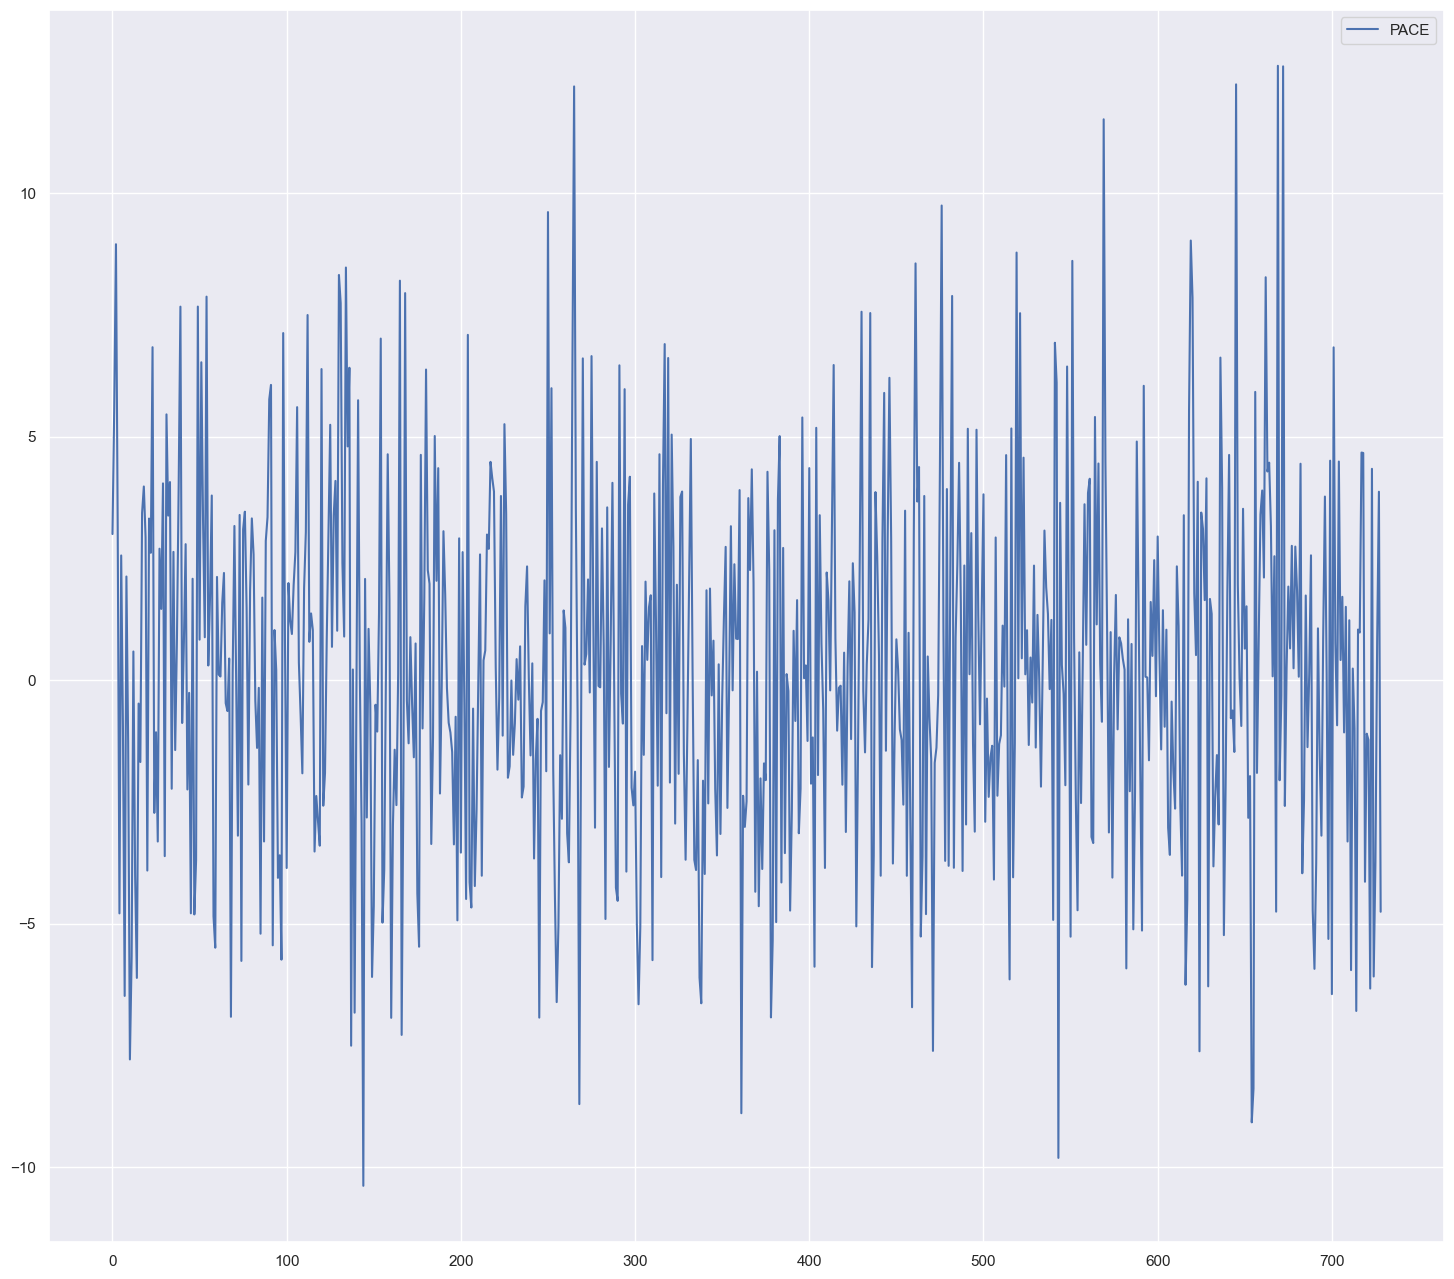

In [392]:
(ridge.predict(X_test) - y_test).to_frame().reset_index(drop = True).plot()

In [527]:
X_train, X_test, y_train, y_test = \
    train_test_split(pace_data, pace_target, test_size=0.3, random_state=156)

### 데이터 예측(2022-23 경기)

In [147]:
# 지난 경기들을 계산하기 위해 지난 경기 이전 데이터를 사용하자
# ATEAM_EFG, BTEAM_OEFG
# 이전 경기들의 평균
def bring_last_game_pace_2223(team_name, game_date):
    data_by_team = g_total_2223[g_total_2223['TEAM'] == team_name].sort_values('GAME DATE').reset_index(drop=True)
    last_game_index_li = data_by_team[data_by_team['GAME DATE'] < game_date].index.values    
    total = 0
    for index in last_game_index_li:     
        total += data_by_team.iloc[index].PACE
        
    if len(last_game_index_li) == 0:
        result = np.nan
    else:        
        result = total / len(last_game_index_li)   
    return round(result,1)


In [1389]:
predict_pace_df = pd.DataFrame()

In [1390]:
predict_pace_df['ATEAM_PACE'] = match_up_df['ATEAM'].apply(lambda x : s_advanced_2223[s_advanced_2223['TEAM'] == x]['PACE'].reset_index(drop=True)) 
predict_pace_df['BTEAM_PACE'] = match_up_df['BTEAM'].apply(lambda x : s_advanced_2223[s_advanced_2223['TEAM'] == x]['PACE'].reset_index(drop=True))
predict_pace_df['ATEAM_PRE_PACE'] = match_up_df.apply(lambda x : bring_last_game_pace_2223(x['ATEAM'], x['GAME DATE']), axis = 1)
predict_pace_df['BTEAM_PRE_PACE'] = match_up_df.apply(lambda x : bring_last_game_pace_2223(x['BTEAM'], x['GAME DATE']), axis = 1)

In [1391]:
predict_pace_df

,ATEAM_PACE,BTEAM_PACE,ATEAM_PRE_PACE,BTEAM_PRE_PACE
0,97.62,101.00,97.7,101.4
1,101.00,97.62,101.4,97.7
2,101.64,100.19,101.6,100.1
3,100.19,101.64,100.1,101.6
4,101.89,100.73,101.9,100.6
5,100.73,101.89,100.6,101.9
6,100.12,102.10,99.9,102.2
7,102.10,100.12,102.2,99.9
8,97.24,96.09,97.8,96.4
9,96.09,97.24,96.4,97.8


In [1392]:
predict_pace_df_scale = scaler.fit_transform(predict_pace_df)

In [1393]:
lr_pace.predict(predict_pace_df_scale)

array([ 97.51807665,  97.51807665,  99.85288843,  99.85288843,
       100.43501488, 100.43501488, 100.14050495, 100.14050495,
        93.64148756,  93.64148756, 100.3313202 , 100.3313202 ,
        95.7973647 ,  95.7973647 ,  97.9749471 ,  97.9749471 ,
        98.27693784,  98.27693784, 101.45641261, 101.45641261,
       101.82235012, 101.82235012,  92.95654755,  92.95654755,
       102.04543246, 102.04543246, 101.76470933, 101.76470933,
        96.51677169,  96.51677169])

In [1394]:
ridge_pace.predict(predict_pace_df_scale)

array([ 97.6112684 ,  97.6112684 ,  99.77166508,  99.77166508,
       100.32033994, 100.32033994, 100.04306708, 100.04306708,
        93.98571188,  93.98571188, 100.21219008, 100.21219008,
        96.01355277,  96.01355277,  97.97392033,  97.97392033,
        98.29723771,  98.29723771, 101.26957593, 101.26957593,
       101.62090567, 101.62090567,  93.38914761,  93.38914761,
       101.82412166, 101.82412166, 101.55859054, 101.55859054,
        96.63947138,  96.63947138])

## POINT 예측(버릴 것)

### 데이터 훈련(2021-22 시즌) (페기)

In [536]:
y_target = point_target = g_total_2122['PTS']
X_data = point_data = g_total_2122[['OFFRTG', 'PACE']]

In [537]:
lr_pts = LinearRegression()
lr_pts.fit(point_data, point_target)

LinearRegression()

### 데이터 예측(2022-23 경기) (폐기)

In [653]:
predict_point_df = match_up_df.copy()

In [617]:
# predict_point_df['OFFRTG'] = lr_off.predict(predict_off_df_scale)
# predict_point_df['OFFRTG'] = rf_off.predict(predict_off_df)

# predict_point_df['PACE'] = \
# (match_up_df['ATEAM'].apply(lambda x : s_advanced_2223[s_advanced_2223['TEAM'] == x]['PACE'].reset_index(drop=True)) +\
# match_up_df['BTEAM'].apply(lambda x : s_advanced_2223[s_advanced_2223['TEAM'] == x]['PACE'].reset_index(drop=True)))/2

### 데이터 계산(2022-23 경기)

In [213]:
predict_point_df = match_up_df.copy()

In [214]:
#predict_point_df['OFFRTG'] = lr_off.predict(predict_off_df_pca)
predict_point_df['OFFRTG'] = rg_off.predict(predict_off_df_pca)
predict_point_df['PACE'] = ridge_pace.predict(predict_pace_df_scale)
#predict_point_df['PACE'] = lr_pace.predict(predict_pace_df_scale)

In [215]:
predict_point_df['POINT'] = predict_point_df['OFFRTG'] / 100 * predict_point_df['PACE']

In [216]:
predict_point_df

,ATEAM,BTEAM,GAME DATE,OFFRTG,PACE,POINT
0,DAL,ORL,2022-11-10,117.588988,94.534141,111.161740
1,ORL,DAL,2022-11-10,111.155622,94.534141,105.080012
2,POR,CHA,2022-11-10,112.188041,97.534406,109.421939
3,CHA,POR,2022-11-10,106.885981,97.534406,104.250606
4,DEN,IND,2022-11-10,116.073916,100.634385,116.810271
5,IND,DEN,2022-11-10,110.642881,100.634385,111.344783
6,UTA,ATL,2022-11-10,116.592986,99.929927,116.511286
7,ATL,UTA,2022-11-10,112.149267,99.929927,112.070680
8,DET,BOS,2022-11-10,104.450703,98.079702,102.444938
9,BOS,DET,2022-11-10,115.301118,98.079702,113.086992


In [217]:
result_point_df = match_up_df.iloc[::2,:].reset_index(drop = True)

In [218]:
predict_point_df['POINT'][0::2]

0     111.161740
2     109.421939
4     116.810271
6     116.511286
8     102.444938
10    106.341457
12    102.843494
14    110.260489
16    114.131577
18    113.166829
20    113.867439
22    106.336066
24    112.332430
Name: POINT, dtype: float64

In [219]:
result_point_df['A POINT'] = predict_point_df['POINT'][0::2].values
result_point_df['B POINT'] = predict_point_df['POINT'][1::2].values

In [220]:
result_point_df['V PREDICT'] = np.where(result_point_df['A POINT'] > result_point_df['B POINT'], 'A','B')

In [221]:
#result_point_df['V ACTUAL'] = ['A', 'A', 'B', 'B', 'B', 'B','A', 'B', 'A' ,'A' ,'A' ,'B' ,'B' ,'B' ,'B']

In [222]:
#result_point_df['ox'] = np.where(result_point_df['V PREDICT'] == result_point_df['V ACTUAL'], 'O','X')

In [223]:
result_point_df['TOTAL POINT'] = result_point_df['A POINT'] + result_point_df['B POINT']

In [224]:
result_point_df

,ATEAM,BTEAM,GAME DATE,A POINT,B POINT,V PREDICT,TOTAL POINT
0,DAL,ORL,2022-11-10,111.161740,105.080012,A,216.241752
1,POR,CHA,2022-11-10,109.421939,104.250606,A,213.672545
2,DEN,IND,2022-11-10,116.810271,111.344783,A,228.155054
3,UTA,ATL,2022-11-10,116.511286,112.070680,A,228.581966
4,DET,BOS,2022-11-10,102.444938,113.086992,B,215.531930
5,NYK,BKN,2022-11-10,106.341457,111.921834,B,218.263290
6,HOU,TOR,2022-11-10,102.843494,110.828913,B,213.672407
7,NOP,CHI,2022-11-10,110.260489,109.261873,A,219.522363
8,PHX,MIN,2022-11-10,114.131577,109.004191,A,223.135768
9,MIL,OKC,2022-11-10,113.166829,105.945980,A,219.112809


In [590]:
offrtg = lr_off.predict(predict_off_df_pca)

In [591]:
pace1 = lr_pace.predict(scaler.fit_transform(predict_pace_df))
pace2 = ridge_pace.predict(scaler.fit_transform(predict_pace_df))

In [592]:
print(offrtg / 100 * pace1)
print(offrtg / 100 * pace2)

[108.79741522 104.73396512 112.43625518 114.77411165 109.23174071
 113.37336135 107.94475009 108.68244257]
[108.6554162  104.5972696  112.46237508 114.80077466 109.39456206
 113.54235622 107.90402587 108.64144004]


In [593]:
match_up_df

,ATEAM,BTEAM,GAME DATE
0,CLE,LAL,2022-11-06
1,LAL,CLE,2022-11-06
2,CHI,TOR,2022-11-06
3,TOR,CHI,2022-11-06
4,WAS,MEM,2022-11-06
5,MEM,WAS,2022-11-06
6,UTA,LAC,2022-11-06
7,LAC,UTA,2022-11-06


In [572]:
offrtg

array([109.63418217, 108.64127004, 113.50392508, 116.54870164,
       109.45397406, 104.64745282, 116.15427927, 112.40161038,
       113.02981497, 108.46815209, 111.47102773, 104.52802397,
       112.17713589, 109.74834833, 109.72722162, 108.27124743,
       114.40601273, 111.60797041, 111.04522412, 111.88131089,
       120.18179644, 109.92561409, 112.07162233, 112.01711425,
       117.11067752, 114.08811605, 106.19595277, 118.34484538,
       112.00919149, 104.98166015])

In [571]:
pace1

array([ 99.09882588,  99.09882588,  96.36468434,  96.36468434,
        99.18174224,  99.18174224,  97.63101167,  97.63101167,
       100.19220576, 100.19220576, 101.95371666, 101.95371666,
       101.8279861 , 101.8279861 ,  93.36623592,  93.36623592])

In [548]:
pd.Series(offrtg / 100 * pace1).to_frame().reset_index(drop=True)

,0
0,106.902674
1,105.934500
2,113.340463
3,116.380855
4,109.930449
5,105.103004
6,116.314412
7,112.556569
8,105.826779
9,101.555816


In [594]:
pd.Series(offrtg / 100 * pace2).to_frame().reset_index(drop=True)

,0
0,108.655416
1,104.597270
2,112.462375
3,114.800775
4,109.394562
5,113.542356
6,107.904026
7,108.641440


#  PPT를 위해 잠시 쓰고 버릴 내용

## 샘플 모델 실험

In [44]:
s_traditional_2122.columns

Index([' ', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-'],
      dtype='object')

In [1200]:
sample_r_df = pd.DataFrame()

In [46]:
sample_r_df['ATEAM_OFFRTG'] =  g_total_2122['ATEAM'].apply(lambda x : s_advanced_2122[s_advanced_2122['TEAM'] == x]['OFFRTG'].reset_index(drop=True))
sample_r_df['ATEAM_TS'] =  g_total_2122['ATEAM'].apply(lambda x : s_advanced_2122[s_advanced_2122['TEAM'] == x]['TS%'].reset_index(drop=True))
sample_r_df['ATEAM_EFG'] =  g_total_2122['ATEAM'].apply(lambda x : s_advanced_2122[s_advanced_2122['TEAM'] == x]['EFG%'].reset_index(drop=True))
sample_r_df['ATEAM_PIE'] =  g_total_2122['ATEAM'].apply(lambda x : s_advanced_2122[s_advanced_2122['TEAM'] == x]['PIE'].reset_index(drop=True))
sample_r_df['ATEAM_FG%'] =  g_total_2122['ATEAM'].apply(lambda x : s_traditional_2122[s_traditional_2122['TEAM'] == x]['FG%'].reset_index(drop=True))
sample_r_df['ATEAM_FGA'] =  g_total_2122['ATEAM'].apply(lambda x : s_traditional_2122[s_traditional_2122['TEAM'] == x]['FGA'].reset_index(drop=True))
sample_r_df['ATEAM_3PA'] =  g_total_2122['ATEAM'].apply(lambda x : s_traditional_2122[s_traditional_2122['TEAM'] == x]['3PA'].reset_index(drop=True))
sample_r_df['BTEAM_DEFRTG'] =  g_total_2122['BTEAM'].apply(lambda x : s_advanced_2122[s_advanced_2122['TEAM'] == x]['DEFRTG'].reset_index(drop=True))
sample_r_df['BTEAM_DIFF'] =  g_total_2122['BTEAM'].apply(lambda x : s_diff_2122[s_diff_2122['TEAM'] == x]['DIFF%'].reset_index(drop=True))

In [253]:
y_target = g_total_2122['OFFRTG']
X_data = sample_r_df

In [263]:
X_train, X_test, y_train, y_test = \
    train_test_split(X_data, y_target, test_size=0.1, random_state=156)

In [87]:
from sklearn.metrics import  r2_score
#r2_score(y_test, preds) 

In [264]:
lr = LinearRegression()
lr.fit(X_train, y_train)
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv = 5)
r2_scores = cross_val_score(lr, X_data, y_target, scoring='r2', cv = 5)
avg_r2 = np.mean(r2_scores)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(f'5 folds 의 평균 RMSE : {avg_rmse:.3f}')
print(f'5 folds 의 평균 R2 : {avg_r2:.3f}')

5 folds 의 개별 Negative MSE scores :  [-129.46 -114.81 -115.35 -124.14 -139.65]
5 folds 의 개별 RMSE scores :  [11.38 10.71 10.74 11.14 11.82]
5 folds 의 평균 RMSE : 11.158
5 folds 의 평균 R2 : 0.041


In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [265]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_train, y_train)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv = 5)
r2_scores = cross_val_score(rf, X_data, y_target, scoring='r2', cv = 5)
avg_r2 = np.mean(r2_scores)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(f'5 folds 의 평균 RMSE : {avg_rmse:.3f}')
print(f'5 folds 의 평균 R2 : {avg_r2:.3f}')

5 folds 의 개별 Negative MSE scores :  [-141.66 -123.25 -123.35 -139.08 -145.28]
5 folds 의 개별 RMSE scores :  [11.9  11.1  11.11 11.79 12.05]
5 folds 의 평균 RMSE : 11.591
5 folds 의 평균 R2 : -0.027


In [266]:
kn = KNeighborsRegressor(n_neighbors=200)
kn.fit(X_train, y_train)
neg_mse_scores = cross_val_score(kn, X_data, y_target, scoring='neg_mean_squared_error', cv = 5)
r2_scores = cross_val_score(kn, X_data, y_target, scoring='r2', cv = 5)
avg_r2 = np.mean(r2_scores)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(f'5 folds 의 평균 RMSE : {avg_rmse:.3f}')
print(f'5 folds 의 평균 R2 : {avg_r2:.3f}')

5 folds 의 개별 Negative MSE scores :  [-134.62 -117.42 -121.89 -126.18 -133.94]
5 folds 의 개별 RMSE scores :  [11.6  10.84 11.04 11.23 11.57]
5 folds 의 평균 RMSE : 11.257
5 folds 의 평균 R2 : 0.025


alpha 0 일 때 5 folds 의 평균 RMSE : 11.602 
alpha 0 일 때 5 folds 의 평균 R2 : -0.044 
alpha 1 일 때 5 folds 의 평균 RMSE : 11.158 
alpha 1 일 때 5 folds 의 평균 R2 : 0.041 
alpha 10 일 때 5 folds 의 평균 RMSE : 11.158 
alpha 10 일 때 5 folds 의 평균 R2 : 0.041 
alpha 100 일 때 5 folds 의 평균 RMSE : 11.156 
alpha 100 일 때 5 folds 의 평균 R2 : 0.041 
alpha 200 일 때 5 folds 의 평균 RMSE : 11.155 
alpha 200 일 때 5 folds 의 평균 R2 : 0.041 
alpha 500 일 때 5 folds 의 평균 RMSE : 11.153 
alpha 500 일 때 5 folds 의 평균 R2 : 0.042 
alpha 1000 일 때 5 folds 의 평균 RMSE : 11.156 
alpha 1000 일 때 5 folds 의 평균 R2 : 0.041 


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.85565e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.6842e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.62336e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.85565e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlg

,alpha:0,alpha:1,alpha:10,alpha:100,alpha:200,alpha:500,alpha:1000
BTEAM_DIFF,1.629306,1.628812,1.624378,1.581349,1.536170,1.415067,1.251160
ATEAM_OFFRTG,0.510239,0.359090,0.358369,0.351415,0.344202,0.325281,0.300524
BTEAM_DEFRTG,0.208102,0.359090,0.358369,0.351415,0.344202,0.325281,0.300524
BTEAM_PRE_DEF,0.187041,0.187074,0.187371,0.190240,0.193237,0.201181,0.211678
ATEAM_PRE_OFF,0.101556,0.101568,0.101677,0.102724,0.103818,0.106727,0.110618
ATEAM_PIE,-0.028637,-0.028552,-0.027786,-0.020524,-0.013218,0.004889,0.026378
BTEAM_OEFG,-0.340220,-0.340076,-0.338792,-0.326544,-0.314093,-0.282599,-0.243738
ATEAM_EFG,-0.516848,-0.516656,-0.514930,-0.498196,-0.480647,-0.433774,-0.370884


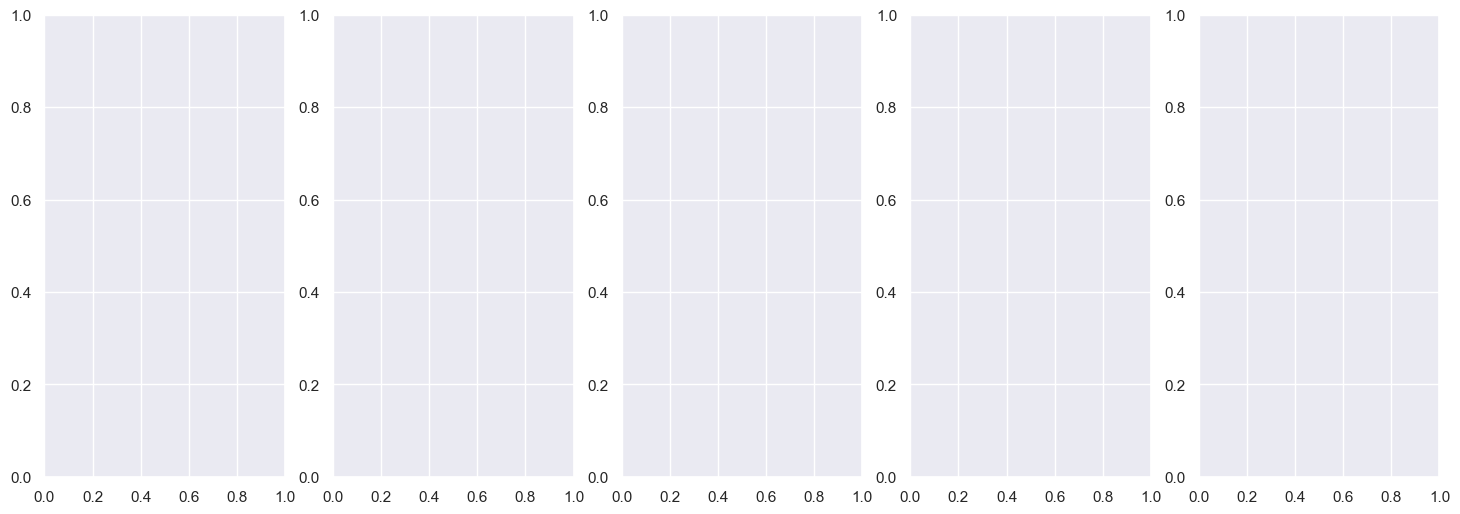

In [274]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 1, 10, 100, 200, 500, 1000]

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구하고, 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
   
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    r2_scores = cross_val_score(ridge, X_data, y_target, scoring='r2', cv = 5)
    avg_r2 = np.mean(r2_scores)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))
    print('alpha {0} 일 때 5 folds 의 평균 R2 : {1:.3f} '.format(alpha,avg_r2))

    # # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    # coeff = coeff.sort_values(ascending=False)
    # axs[pos].set_title(colname)
    # axs[pos].set_xlim(-3,6)
    # sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
#plt.show()

# alpha 값에 따른 컬럼별 회귀계수 출력
sort_column = 'alpha:'+str(alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

In [273]:
lasso = Lasso(alpha = 10)
lasso.fit(X_train, y_train)
neg_mse_scores = cross_val_score(lasso, X_data, y_target, scoring='neg_mean_squared_error', cv = 5)
r2_scores = cross_val_score(lasso, X_data, y_target, scoring='r2', cv = 5)
avg_r2 = np.mean(r2_scores)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(f'5 folds 의 평균 RMSE : {avg_rmse:.3f}')
print(f'5 folds 의 평균 R2 : {avg_r2:.3f}')

5 folds 의 개별 Negative MSE scores :  [-152.89 -124.16 -124.21 -130.34 -145.83]
5 folds 의 개별 RMSE scores :  [12.36 11.14 11.14 11.42 12.08]
5 folds 의 평균 RMSE : 11.629
5 folds 의 평균 R2 : -0.041


In [105]:
lr.predict(X_test) - y_test

538     -4.011475
511     -5.679743
1874     5.345529
1000    22.108211
2351    12.951533
          ...    
352      3.539133
930     -1.520216
680     -7.076692
1862     2.477202
1966    16.421654
Name: OFFRTG, Length: 246, dtype: float64

In [110]:
ridge0 = Ridge(alpha=0)
ridge10 = Ridge(alpha=10)
ridge100 = Ridge(alpha=100)
ridge1000 = Ridge(alpha=1000)
ridge0.fit(X_train, y_train)
ridge10.fit(X_train, y_train)
ridge100.fit(X_train, y_train)
ridge1000.fit(X_train, y_train)

Ridge(alpha=1000)

In [107]:
sns.set(rc = {'figure.figsize': (10, 4)})

<AxesSubplot:>

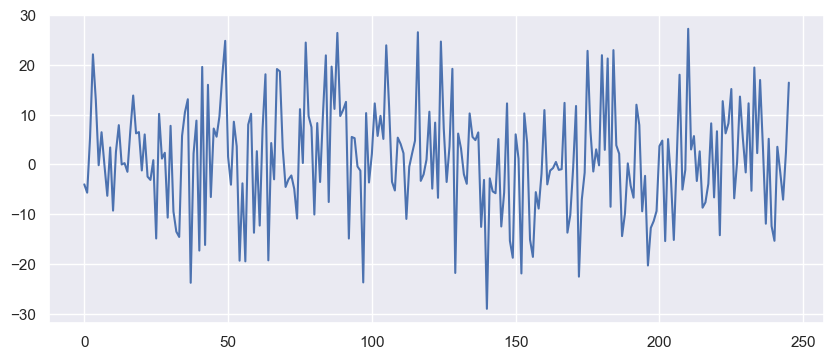

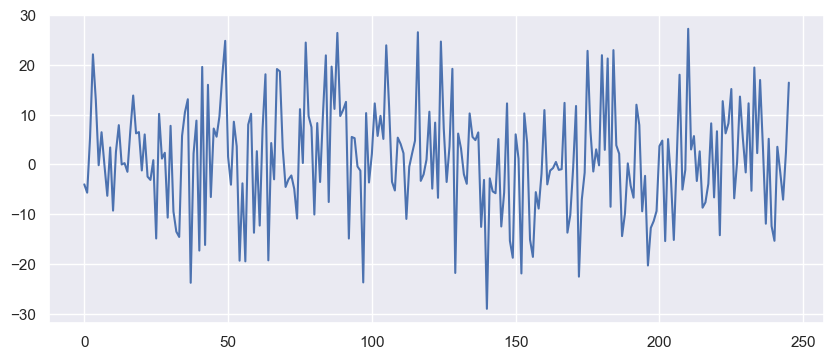

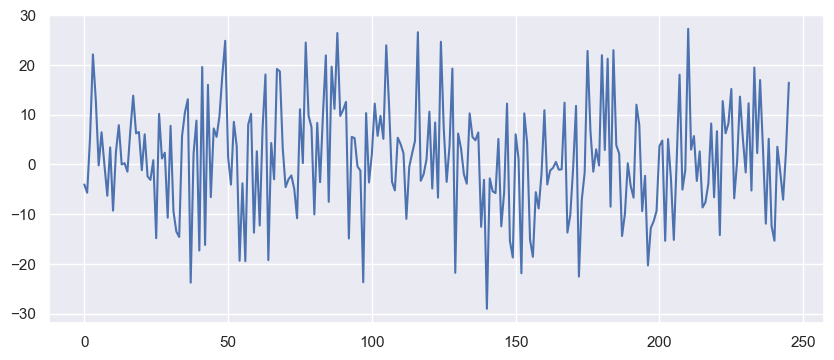

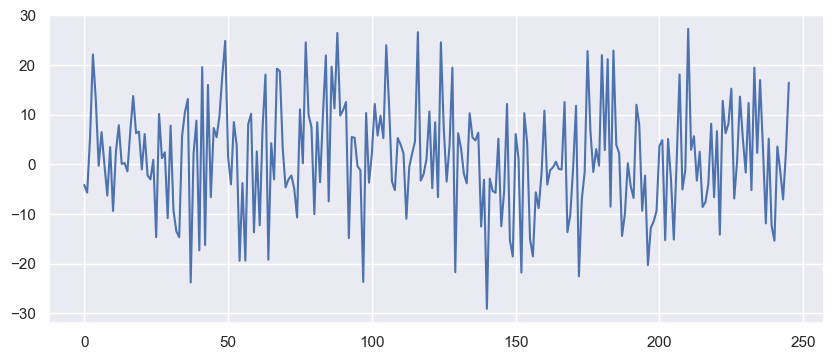

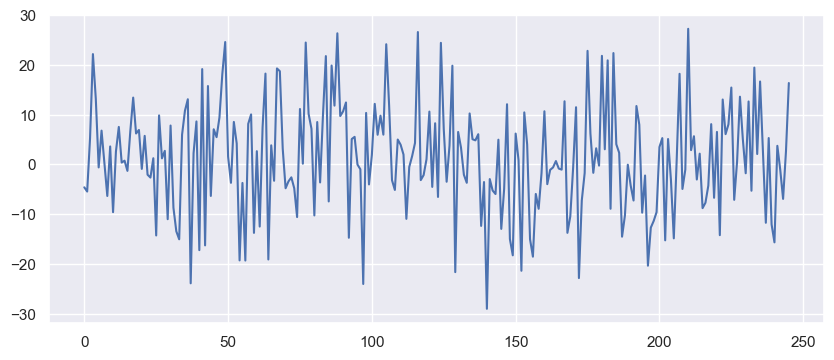

In [206]:
(lr.predict(X_test) - y_test).to_frame().reset_index(drop = True).plot(legend=None)
#(rf.predict(X_test) - y_test).to_frame().reset_index(drop = True).plot(legend=None)
#(kn.predict(X_test) - y_test).to_frame().reset_index(drop = True).plot(legend=None)
#(lasso.predict(X_test) - y_test).to_frame().reset_index(drop = True).plot(legend=None)
(ridge0.predict(X_test) - y_test).to_frame().reset_index(drop = True).plot(legend=None)
(ridge10.predict(X_test) - y_test).to_frame().reset_index(drop = True).plot(legend=None)
(ridge100.predict(X_test) - y_test).to_frame().reset_index(drop = True).plot(legend=None)
(ridge1000.predict(X_test) - y_test).to_frame().reset_index(drop = True).plot(legend=None)

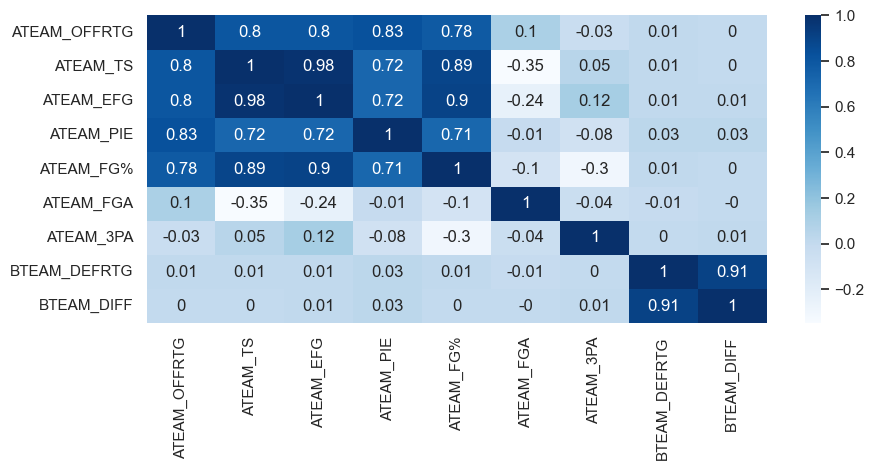

In [116]:
correlation_matrix = sample_r_df.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True, cmap='Blues') #seaborn의 히트맵으로 시각화 
plt.show() 

In [286]:
sample_r_df = pd.DataFrame()

In [ ]:
sample_r_df['ATEAM_OFFRTG'] =  g_total_2122.apply(lambda x : bring_last_game_od_2122(x['ATEAM'], x['GAME DATE'], 'OFFRTG'), axis = 1)
sample_r_df['ATEAM_PRE_OFF'] =  g_total_2122.apply(lambda x : bring_last_game_off_2122(x['ATEAM'],x['GAME DATE'], 'OFFRTG'), axis=1)
sample_r_df['ATEAM_EFG'] =  g_total_2122.apply(lambda x : bring_last_game_efg_2122(x['ATEAM'], x['GAME DATE'], 'EFG'), axis = 1)
sample_r_df['ATEAM_PIE'] =  g_total_2122.apply(lambda x : bring_last_game_od_2122(x['ATEAM'], x['GAME DATE'], 'PIE'), axis = 1)
sample_r_df['BTEAM_DEFRTG'] =  g_total_2122.apply(lambda x : bring_last_game_od_2122(x['ATEAM'], x['GAME DATE'], 'OFFRTG'), axis = 1)
sample_r_df['BTEAM_PRE_DEF'] =  g_total_2122.apply(lambda x : bring_last_game_off_2122(x['BTEAM'],x['GAME DATE'], 'DEFRTG'), axis=1)
sample_r_df['BTEAM_DIFF'] =  g_total_2122['BTEAM'].apply(lambda x : s_diff_2122[s_diff_2122['TEAM'] == x]['DIFF%'].reset_index(drop=True))
sample_r_df['BTEAM_OEFG'] =  g_total_2122.apply(lambda x : bring_last_game_efg_2122(x['ATEAM'], x['GAME DATE'], 'OEFG'), axis = 1)

In [ ]:
a = sample_r_df.columns.values

In [ ]:
b = sample_r_df.columns.values 

In [ ]:
b = np.append(b, np.nan)

In [ ]:
s_df = pd.DataFrame(columns=['OLD', 'NEW'])

In [ ]:
s_df['OLD'] = a

In [ ]:
s_df['NEW'] = b

In [ ]:
s_df

,OLD,NEW
0,ATEAM_OFFRTG,ATEAM_OFFRTG
1,ATEAM_TS,ATEAM_PRE_OFF
2,ATEAM_EFG,ATEAM_EFG
3,ATEAM_PIE,ATEAM_PIE
4,ATEAM_FG%,BTEAM_DEFRTG
5,ATEAM_FGA,BTEAM_PRE_DEF
6,ATEAM_3PA,BTEAM_DIFF
7,BTEAM_DEFRTG,BTEAM_OEFG
8,BTEAM_DIFF,NaN


## 샘플 예측

In [1349]:
sample_r_df = pd.DataFrame()

In [ ]:
# OLD FEATURES

In [1350]:
sample_r_df['ATEAM_OFFRTG'] =  g_total_2122.apply(lambda x : bring_last_game_od_2122(x['ATEAM'], x['GAME DATE'], 'OFFRTG'), axis = 1)
sample_r_df['ATEAM_TS'] =  g_total_2122.apply(lambda x : bring_last_game_od_2122(x['ATEAM'], x['GAME DATE'], 'TS%'), axis = 1)
sample_r_df['ATEAM_EFG'] =  g_total_2122.apply(lambda x : bring_last_game_efg_2122(x['ATEAM'], x['GAME DATE'], 'EFG'), axis = 1)
sample_r_df['ATEAM_PIE'] =  g_total_2122.apply(lambda x : bring_last_game_od_2122(x['ATEAM'], x['GAME DATE'], 'PIE'), axis = 1)
sample_r_df['ATEAM_FG%'] =  g_total_2122.apply(lambda x : bring_last_game_od_2122(x['ATEAM'], x['GAME DATE'], 'FG%'), axis = 1)
sample_r_df['ATEAM_FGA'] =  g_total_2122.apply(lambda x : bring_last_game_od_2122(x['ATEAM'], x['GAME DATE'], 'FGA'), axis = 1)
sample_r_df['ATEAM_3PA'] =  g_total_2122.apply(lambda x : bring_last_game_od_2122(x['ATEAM'], x['GAME DATE'], '3PA'), axis = 1)
sample_r_df['BTEAM_DEFRTG'] =  g_total_2122.apply(lambda x : bring_last_game_od_2122(x['ATEAM'], x['GAME DATE'], 'OFFRTG'), axis = 1)
sample_r_df['BTEAM_DIFF'] =  g_total_2122['BTEAM'].apply(lambda x : s_diff_2122[s_diff_2122['TEAM'] == x]['DIFF%'].reset_index(drop=True))

In [ ]:
# NEW FEATURES

In [1150]:
sample_r_df['ATEAM_OFFRTG'] =  g_total_2122.apply(lambda x : bring_last_game_od_2122(x['ATEAM'], x['GAME DATE'], 'OFFRTG'), axis = 1)
sample_r_df['ATEAM_PRE_OFF'] =  g_total_2122.apply(lambda x : bring_last_game_off_2122(x['ATEAM'],x['GAME DATE'], 'OFFRTG'), axis=1)
sample_r_df['ATEAM_EFG'] =  g_total_2122.apply(lambda x : bring_last_game_efg_2122(x['ATEAM'], x['GAME DATE'], 'EFG'), axis = 1)
sample_r_df['ATEAM_PIE'] =  g_total_2122.apply(lambda x : bring_last_game_od_2122(x['ATEAM'], x['GAME DATE'], 'PIE'), axis = 1)
sample_r_df['BTEAM_DEFRTG'] =  g_total_2122.apply(lambda x : bring_last_game_od_2122(x['ATEAM'], x['GAME DATE'], 'OFFRTG'), axis = 1)
sample_r_df['BTEAM_PRE_DEF'] =  g_total_2122.apply(lambda x : bring_last_game_off_2122(x['BTEAM'],x['GAME DATE'], 'DEFRTG'), axis=1)
sample_r_df['BTEAM_DIFF'] =  g_total_2122['BTEAM'].apply(lambda x : s_diff_2122[s_diff_2122['TEAM'] == x]['DIFF%'].reset_index(drop=True))
sample_r_df['BTEAM_OEFG'] =  g_total_2122.apply(lambda x : bring_last_game_efg_2122(x['ATEAM'], x['GAME DATE'], 'OEFG'), axis = 1)

In [1351]:
y_target = g_total_2122['OFFRTG']
X_data = sample_r_df

In [1352]:
# 결측치 제거해주고~
for i in X_data.columns:     
    y_target = y_target[X_data[i].notna()]    
    X_data = X_data[X_data[i].notna()]

In [1278]:
scaler = StandardScaler()
pca = PCA(n_components = 3)

In [1332]:
X_data_scale = scaler.fit_transform(X_data)
X_data_pca = pca.fit_transform(X_data_scale)
X_lasso_pca = pca.fit_transform(X_data)

In [1353]:
s_lr = LinearRegression()
s_rf = RandomForestRegressor(n_estimators=50)
s_kn = KNeighborsRegressor(n_neighbors=200)
s_lasso = Lasso(alpha=10)
s_ridge0 = Ridge(alpha=0)
s_ridge10 = Ridge(alpha=10)
s_ridge100 = Ridge(alpha=100)
s_ridge1000 = Ridge(alpha=1000)
s_lr.fit(X_data, y_target)
s_rf.fit(X_data, y_target)
s_kn.fit(X_data, y_target)
s_lasso.fit(X_data, y_target)
s_ridge0.fit(X_data, y_target)
s_ridge10.fit(X_data, y_target)
s_ridge100.fit(X_data, y_target)
s_ridge1000.fit(X_data, y_target)

Ridge(alpha=1000)

In [1395]:
sample_p_df = pd.DataFrame()

In [1396]:
# OLD FEATURES

In [1397]:
sample_p_df['ATEAM_OFFRTG'] =  match_up_df.apply(lambda x : bring_last_game_od_2223(x['ATEAM'], x['GAME DATE'], 'OFFRTG'), axis = 1)
sample_p_df['ATEAM_TS'] =  match_up_df.apply(lambda x : bring_last_game_od_2223(x['ATEAM'], x['GAME DATE'], 'TS%'), axis = 1)
sample_p_df['ATEAM_EFG'] =  match_up_df.apply(lambda x : bring_last_game_efg_2223(x['ATEAM'], x['GAME DATE'], 'EFG'), axis = 1)
sample_p_df['ATEAM_PIE'] =  match_up_df.apply(lambda x : bring_last_game_od_2223(x['ATEAM'], x['GAME DATE'], 'PIE'), axis = 1)
sample_p_df['ATEAM_FG%'] =  match_up_df.apply(lambda x : bring_last_game_od_2223(x['ATEAM'], x['GAME DATE'], 'FG%'), axis = 1)
sample_p_df['ATEAM_FGA'] =  match_up_df.apply(lambda x : bring_last_game_od_2223(x['ATEAM'], x['GAME DATE'], 'FGA'), axis = 1)
sample_p_df['ATEAM_3PA'] =  match_up_df.apply(lambda x : bring_last_game_od_2223(x['ATEAM'], x['GAME DATE'], '3PA'), axis = 1)
sample_p_df['BTEAM_DEFRTG'] =  match_up_df.apply(lambda x : bring_last_game_od_2223(x['ATEAM'], x['GAME DATE'], 'OFFRTG'), axis = 1)
sample_p_df['BTEAM_DIFF'] =  match_up_df['BTEAM'].apply(lambda x : s_diff_2122[s_diff_2223['TEAM'] == x]['DIFF%'].reset_index(drop=True))

In [ ]:
# NEW FEATURES

In [1173]:
sample_p_df['ATEAM_OFFRTG'] = match_up_df.apply(lambda x : bring_last_game_od_2223(x['ATEAM'], x['GAME DATE'], 'OFFRTG'), axis = 1) 
sample_p_df['ATEAM_PRE_OFF'] = match_up_df.apply(lambda x : bring_last_game_off_2223(x['ATEAM'],x['GAME DATE'], 'OFFRTG'), axis=1)
sample_p_df['ATEAM_EFG'] = match_up_df.apply(lambda x : bring_last_game_efg_2223(x['ATEAM'], x['GAME DATE'], 'EFG'), axis = 1)
sample_p_df['ATEAM_PIE'] =  match_up_df.apply(lambda x : bring_last_game_od_2223(x['ATEAM'], x['GAME DATE'], 'PIE'), axis = 1) 
sample_p_df['BTEAM_DEFRTG'] = match_up_df.apply(lambda x : bring_last_game_od_2223(x['BTEAM'], x['GAME DATE'], 'DEFRTG'), axis = 1) 
sample_p_df['BTEAM_PRE_DEF'] = match_up_df.apply(lambda x : bring_last_game_off_2223(x['BTEAM'],x['GAME DATE'], 'DEFRTG'), axis=1)
sample_p_df['BTEAM_DIFF'] = match_up_df['BTEAM'].apply(lambda x : s_diff_2223[s_diff_2223['TEAM'] == x]['DIFF%'].reset_index(drop=True))
sample_p_df['BTEAM_OEFG'] = match_up_df.apply(lambda x : bring_last_game_efg_2223(x['BTEAM'], x['GAME DATE'], 'OEFG'), axis = 1) 

In [1398]:
sample_p_scale = scaler.fit_transform(sample_p_df)
sample_p_pca =  pca.fit_transform(sample_p_scale)
lasso_p_pca = pca.fit_transform(sample_p_df)

In [1399]:
lr_p = s_lr.predict(sample_p_df)
rf_p = s_rf.predict(sample_p_df)
kn_p = s_kn.predict(sample_p_df)
ls_p = s_lasso.predict(sample_p_df)
rg0_p = s_ridge0.predict(sample_p_df)
rg10_p = s_ridge10.predict(sample_p_df)
rg100_p = s_ridge100.predict(sample_p_df)
rg1000_p = s_ridge1000.predict(sample_p_df)

In [1459]:
sample_p_point_df = match_up_df.copy()

In [1460]:
sample_p_point_df['OFFRTG'] = lr_p
# sample_p_point_df['OFFRTG'] = rf_p
# sample_p_point_df['OFFRTG'] = kn_p
# sample_p_point_df['OFFRTG'] = ls_p
# sample_p_point_df['OFFRTG'] = rg0_p
# sample_p_point_df['OFFRTG'] = rg10_p
# sample_p_point_df['OFFRTG'] = rg100_p
# sample_p_point_df['OFFRTG'] = rg1000_p

# ---------------------------------------

sample_p_point_df['PACE'] = ridge_pace.predict(predict_pace_df_scale)
#predict_point_df['PACE'] = lr_pace.predict(predict_pace_df_scale)

In [1461]:
sample_p_point_df['POINT'] = sample_p_point_df['OFFRTG'] / 100 * sample_p_point_df['PACE']

In [1462]:
sample_p_point_df

,ATEAM,BTEAM,GAME DATE,OFFRTG,PACE,POINT
0,WAS,CHA,2022-11-07,111.518422,97.611268,108.854546
1,CHA,WAS,2022-11-07,107.671902,97.611268,105.099909
2,HOU,ORL,2022-11-07,111.102954,99.771665,110.849267
3,ORL,HOU,2022-11-07,118.174128,99.771665,117.904295
4,OKC,DET,2022-11-07,114.065551,100.320340,114.430949
5,DET,OKC,2022-11-07,108.274571,100.320340,108.621418
6,NOP,IND,2022-11-07,116.043905,100.043067,116.093882
7,IND,NOP,2022-11-07,113.901551,100.043067,113.950605
8,PHX,PHI,2022-11-07,120.169264,93.985712,112.941939
9,PHI,PHX,2022-11-07,108.472889,93.985712,101.949017


In [1463]:
sample_result_df = match_up_df.iloc[::2,:].reset_index(drop = True)

In [1464]:
sample_result_df

,ATEAM,BTEAM,GAME DATE
0,WAS,CHA,2022-11-07
1,HOU,ORL,2022-11-07
2,OKC,DET,2022-11-07
3,NOP,IND,2022-11-07
4,PHX,PHI,2022-11-07
5,MIL,ATL,2022-11-07
6,POR,MIA,2022-11-07
7,TOR,CHI,2022-11-07
8,BOS,MEM,2022-11-07
9,NYK,MIN,2022-11-07


In [1465]:
sample_result_df['A POINT'] = sample_p_point_df['POINT'][0::2].values
sample_result_df['B POINT'] = sample_p_point_df['POINT'][1::2].values

In [1466]:
sample_result_df['V PREDICT'] = np.where(sample_result_df['A POINT'] > sample_result_df['B POINT'], 'A','B')

In [1467]:
# 일요일 경기
# sample_result_df['V ACTUAL'] = ['A', 'A', 'B', 'A', 'B', 'B', 'B','B']
# 월요일 경기
# sample_result_df['V ACTUAL'] = ['A', 'B', 'B', 'A']
# 화요일 경기
sample_result_df['V ACTUAL'] = ['A', 'A', 'B', 'B', 'B', 'B', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'B']
# 수요일 경기
# sample_result_df['V ACTUAL'] = ['B', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'B', 'B']

In [1468]:
sample_result_df['PREDICT TOTAL'] = sample_result_df['A POINT'] + sample_result_df['B POINT']

In [1469]:
# 일요일 경기
# sample_result_df['ACTUAL TOTAL'] = [249, 192, 245, 251, 202, 246, 227, 184]
# 월요일 경기
# sample_result_df['ACTUAL TOTAL'] = [214, 217, 200, 212]
# 화요일 경기
sample_result_df['ACTUAL TOTAL'] = [208, 261, 215, 251, 188, 215, 217, 208, 215, 227, 224, 190, 229, 255, 236]
# 수요일 경기
# sample_result_df['ACTUAL TOTAL'] = [181, 200, 241, 244, 240, 197, 225, 226, 246, 254, 246, 215, 247]

In [1470]:
sample_result_df['ox'] = np.where(sample_result_df['V PREDICT'] == sample_result_df['V ACTUAL'], 'O','X')

In [1471]:
sample_result_df['TOTAL DIFF'] = abs(sample_result_df['PREDICT TOTAL'] - sample_result_df['ACTUAL TOTAL'])

In [1472]:
sample_result_df

,ATEAM,BTEAM,GAME DATE,A POINT,B POINT,V PREDICT,V ACTUAL,PREDICT TOTAL,ACTUAL TOTAL,ox,TOTAL DIFF
0,WAS,CHA,2022-11-07,108.854546,105.099909,A,A,213.954455,208,O,5.954455
1,HOU,ORL,2022-11-07,110.849267,117.904295,B,A,228.753562,261,X,32.246438
2,OKC,DET,2022-11-07,114.430949,108.621418,A,B,223.052366,215,X,8.052366
3,NOP,IND,2022-11-07,116.093882,113.950605,A,B,230.044487,251,X,20.955513
4,PHX,PHI,2022-11-07,112.941939,101.949017,A,B,214.890955,188,X,26.890955
5,MIL,ATL,2022-11-07,113.960437,112.287644,A,B,226.248081,215,X,11.248081
6,POR,MIA,2022-11-07,109.750148,108.765142,A,A,218.515290,217,O,1.515290
7,TOR,CHI,2022-11-07,113.396194,112.127031,A,B,225.523225,208,X,17.523225
8,BOS,MEM,2022-11-07,113.619589,113.226077,A,A,226.845666,215,O,11.845666
9,NYK,MIN,2022-11-07,113.065210,108.968130,A,A,222.033340,227,O,4.966660
